In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
DATA_DIR = "data/gender.parquet"

In [3]:
df = pd.read_parquet(DATA_DIR, engine="pyarrow")
df.head()

queries  \
0  [216, 359, 12329, 3, 45, 4002, 2066, 32, 3931,...   
1                                                 []   
2                                     [23463, 18831]   
3                                  [1634, 3609, 654]   
4  [11064, 227, 623, 1301, 43999, 35411, 2492, 11...   

                                                apps  \
0  [4, 4, 25, 7, 30, 58, 16, 19, 17, 21, 10, 10, ...   
1  [129, 71, 9, 8, 11, 25, 18, 58, 6, 16, 125, 12...   
2  [9, 174, 65, 8, 63, 97, 62, 103, 61, 116, 59, ...   
3  [99, 73, 9, 8, 59, 37, 131, 3, 89, 6, 24, 16, ...   
4  [9, 8, 17, 54, 3, 25, 22, 6, 21, 7, 14, 5, 817...   

                                               games gender  birth_year  
0                                        [9151, 208]      M      1366.0  
1       [460, 4939, 14, 232, 6387, 1758, 5834, 3, 2]      F      1359.0  
2  [448, 723, 267, 9064, 10634, 166, 782, 224, 27...      M      1373.0  
3                       [78, 2607, 478, 435, 9, 192]      M         0.0  
4                                      [1702, 1, 53]      M      1364.0

In [4]:
df.tail()

queries  \
40266  [13388, 10571, 122, 1961, 42946, 823, 3349, 10...   
40267  [2655, 11, 1732, 2847, 15222, 884, 39, 1433, 2...   
40268  [9, 33200, 5028, 357, 4, 233, 262, 2180, 376, ...   
40269                                 [9, 276, 27, 1074]   
40270  [6421, 11377, 6980, 852, 31, 185, 2348, 534, 4...   

                                                    apps  \
40266  [9, 8, 17, 3, 25, 22, 6, 24, 12, 7, 14, 5, 4, ...   
40267  [8, 11, 10, 10, 39, 17, 771, 48, 3, 25, 95, 22...   
40268  [54, 9, 8, 10, 10, 39, 17, 48, 3, 25, 6, 21, 1...   
40269  [9, 8, 17, 48, 54, 3, 25, 22, 6, 21, 7, 45, 14...   
40270  [43, 8, 10, 10, 39, 17, 48, 54, 3, 25, 22, 6, ...   

                                             games gender  birth_year  
40266  [3, 55, 1115, 135, 410, 38, 1426, 107, 374]      M      1394.0  
40267                                        [717]      M      1354.0  
40268                                    [312, 22]      M      1364.0  
40269                              [73, 2, 53, 75]      M      1365.0  
40270                              [355, 278, 185]      M      1390.0

In [5]:
df.shape

(40271, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40271 entries, 0 to 40270
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   queries     40271 non-null  object 
 1   apps        40271 non-null  object 
 2   games       40271 non-null  object 
 3   gender      40271 non-null  object 
 4   birth_year  40271 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.5+ MB


In [5]:
df["birth_year"] = df["birth_year"].astype(np.uint)

There is no `NaN` value heare as we can see in `birth_year` we have `0` which is not acceptable. So we should replace them with new values.

In addition to `birth_year` we should make gender column numeric, although it is our goal column.

In [6]:
valid_birth_year = df["birth_year"][df["birth_year"] != 0]
mean_birth_year = round(valid_birth_year.mean())

In [7]:
df["birth_year"] = df["birth_year"].replace(0, mean_birth_year)
df["gender"] = df["gender"].replace({'M': 1, 'F': 0})
df.head()

queries  \
0  [216, 359, 12329, 3, 45, 4002, 2066, 32, 3931,...   
1                                                 []   
2                                     [23463, 18831]   
3                                  [1634, 3609, 654]   
4  [11064, 227, 623, 1301, 43999, 35411, 2492, 11...   

                                                apps  \
0  [4, 4, 25, 7, 30, 58, 16, 19, 17, 21, 10, 10, ...   
1  [129, 71, 9, 8, 11, 25, 18, 58, 6, 16, 125, 12...   
2  [9, 174, 65, 8, 63, 97, 62, 103, 61, 116, 59, ...   
3  [99, 73, 9, 8, 59, 37, 131, 3, 89, 6, 24, 16, ...   
4  [9, 8, 17, 54, 3, 25, 22, 6, 21, 7, 14, 5, 817...   

                                               games  gender  birth_year  
0                                        [9151, 208]       1        1366  
1       [460, 4939, 14, 232, 6387, 1758, 5834, 3, 2]       0        1359  
2  [448, 723, 267, 9064, 10634, 166, 782, 224, 27...       1        1373  
3                       [78, 2607, 478, 435, 9, 192]       1        1371  
4                                      [1702, 1, 53]       1        1364

In [10]:
df.describe()

gender    birth_year
count  40271.000000  40271.000000
mean       0.742991   1370.967495
std        0.436990     11.706620
min        0.000000   1300.000000
25%        0.000000   1364.000000
50%        1.000000   1371.000000
75%        1.000000   1380.000000
max        1.000000   1398.000000

## Dealing with list values

As it's clear hear that three of our main columns which are `queries`, `apps`, and `games` are lists so we should desl with them.

Actually, if you look closely, you will find that lists are everywhere! Here are some practical problems, where you will probably encounter list values.

* Audio-video tags
* Open-ended questions in survey data
* List of all authors, artists, producers, etc. invloved in a creative product

### What is wrong with list values?
List values mess up everything you know about data analysis. The simplest operations can not be performed without endless looping. 

An example of this is here:

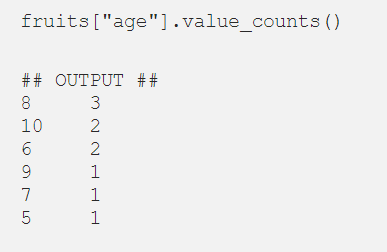

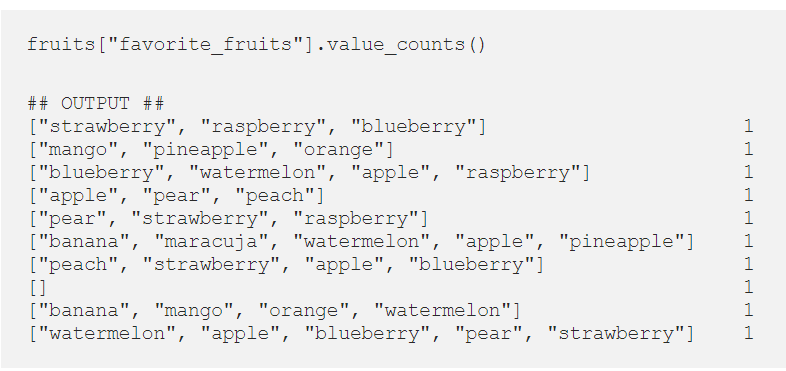

The reason this does not work is that Pandas does not have direct access to every individual element of the lists. Thus, Pandas is unable to apply functions like value_counts() properly. 

In [8]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [9]:
to_1D(df['queries']).value_counts()

2        8229
3        8174
4        7870
1        7816
5        6605
         ... 
43591       1
49796       1
36214       1
37550       1
41955       1
Length: 47287, dtype: int64

In [10]:
to_1D(df['apps']).value_counts()

4        41154
1        40271
2        40194
3        38390
10       37980
         ...  
22089        1
19999        1
16220        1
12370        1
30151        1
Length: 36598, dtype: int64

In [11]:
to_1D(df['games']).value_counts()

2        5534
1        3662
9        2324
4        2131
16       2045
         ... 
3942        1
30718       1
8524        1
8361        1
14970       1
Length: 15414, dtype: int64

Text(0.5, 1.0, 'Query Ids')

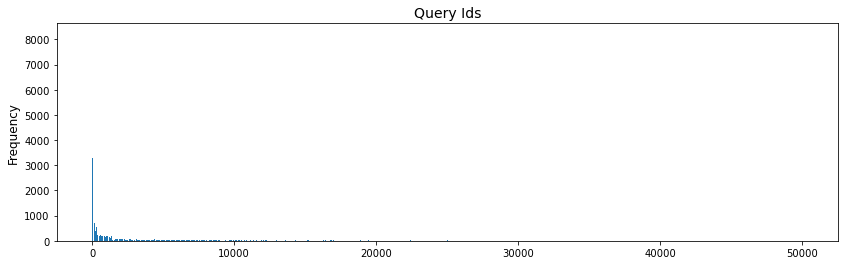

In [15]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df["queries"]).value_counts().index,
        to_1D(df["queries"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Query Ids", size = 14)

Text(0.5, 1.0, 'App Ids')

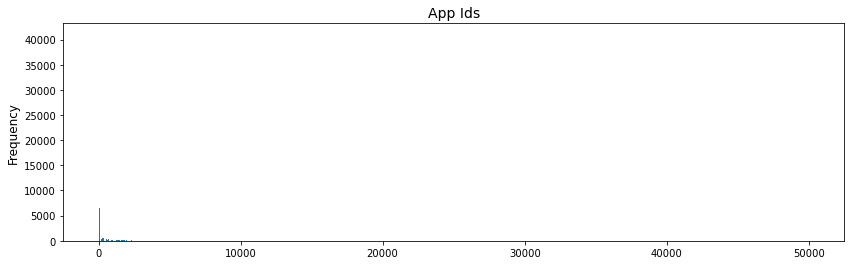

In [16]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df["apps"]).value_counts().index,
        to_1D(df["apps"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("App Ids", size = 14)

Text(0.5, 1.0, 'Game Ids')

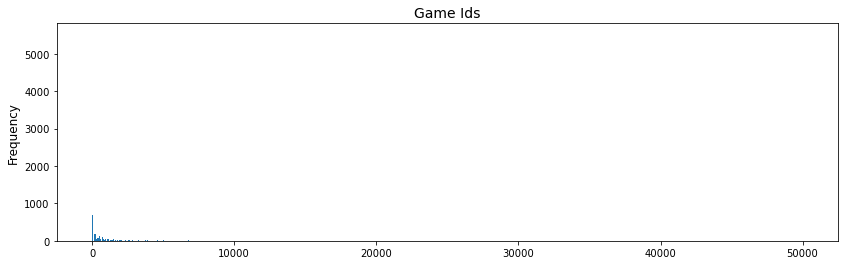

In [17]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(df["games"]).value_counts().index,
        to_1D(df["games"]).value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Game Ids", size = 14)

In [12]:
df = pd.concat([df.pop('queries').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('apps').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('games').apply(pd.Series), df], axis=1)
df.fillna(0, inplace=True)
df.head()

0       1      2       3        4       5       6      7      8  \
0  9151.0   208.0    0.0     0.0      0.0     0.0     0.0    0.0    0.0   
1   460.0  4939.0   14.0   232.0   6387.0  1758.0  5834.0    3.0    2.0   
2   448.0   723.0  267.0  9064.0  10634.0   166.0   782.0  224.0  273.0   
3    78.0  2607.0  478.0   435.0      9.0   192.0     0.0    0.0    0.0   
4  1702.0     1.0   53.0     0.0      0.0     0.0     0.0    0.0    0.0   

        9  ...   88   89   90   91   92   93   94   95  gender  birth_year  
0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1        1366  
1     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0        1359  
2  4086.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1        1373  
3     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1        1371  
4     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1        1364  

[5 rows x 932 columns]

In [13]:
from sklearn.model_selection import train_test_split

X, y =  df.drop(columns=["gender"]), df["gender"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
cross_val_score(model, X_train, y_train, cv=10)

array([0.63935444, 0.64276847, 0.63687151, 0.63842334, 0.62259466,
       0.63749224, 0.63458553, 0.64141571, 0.63023906, 0.64452034])

In [23]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [4]:
from sklearn import metrics

def evaluate(predicted, actual):
    print("Accuracy: ", metrics.accuracy_score(actual, predicted))
    print("Balanced Accuracy: ", metrics.balanced_accuracy_score(actual, predicted))
    print("Precision: ", metrics.precision_score(actual, predicted))
    print("Recall: ", metrics.recall_score(actual, predicted))
    print("F1: ", metrics.f1_score(actual, predicted))

In [25]:
evaluate(predicted, y_test)

Accuracy:  0.6441961514587213
Balanced Accuracy:  0.5421774831735213
Precision:  0.7637474541751528
Recall:  0.7532641446267158
F1:  0.7584695769425248


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0, max_depth=10)
cross_val_score(model, X_train, y_train, cv=10)

array([0.74332713, 0.74332713, 0.74332713, 0.74332713, 0.74332713,
       0.74332713, 0.7435579 , 0.74324744, 0.74324744, 0.74324744])

In [27]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [28]:
evaluate(predicted, y_test)

Accuracy:  0.741651148355059
Balanced Accuracy:  0.5
Precision:  0.741651148355059
Recall:  1.0
F1:  0.8516644094375936


In [39]:
from sklearn.model_selection import GridSearchCV

parameters = { 'n_estimators': [2, 5, 10, 20, 30, 50, 100, 200],
                   'min_samples_split': [2, 3],
                   'min_samples_leaf': [1, 2, 3],
                   'max_depth': [2, 5, 10, 20, 50 ,100]
                 }

grid_search = GridSearchCV(estimator=model, param_grid=parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=10, random_state=0),
             param_grid={'max_depth': [2, 5, 10, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [2, 5, 10, 20, 30, 50, 100, 200]})

In [40]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [42]:
model = RandomForestClassifier(random_state=0, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_score(model, X_train, y_train, cv=10)

array([0.74270639, 0.74301676, 0.74394786, 0.74332713, 0.74363749,
       0.74301676, 0.74262651, 0.74324744, 0.74293698, 0.74231605])

In [43]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [44]:
evaluate(predicted, y_test)

Accuracy:  0.7417752948479206
Balanced Accuracy:  0.5007099883573654
Precision:  0.7419234592445328
Recall:  0.9994978239035822
F1:  0.8516616745114819


As we can see although we have not-bad accuracy but balanced accuracy which is wanted for this task is not good so we should look for better moodels.

By remember that with these parameters:
```
{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100
}
```
 
We got these results:
```
Accuracy:  0.7417752948479206
Balanced Accuracy:  0.5007099883573654
Precision:  0.7419234592445328
Recall:  0.9994978239035822
F1:  0.8516616745114819
```

In [26]:
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'n_neighbors': [3, 5, 7, 9, 15, 19, 25, 35, 55,75, 99],
                'leaf_size': [20, 30, 50, 70],
              'weights': ['uniform', 'distance']
                 }

model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=parameters, verbose=10, scoring="balanced_accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV 1/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 1/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.504 total time=   4.5s
[CV 2/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 2/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.510 total time=   4.1s
[CV 3/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 3/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.504 total time=   4.1s
[CV 4/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 4/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.506 total time=   4.3s
[CV 5/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 5/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.501 total time=   4.1s
[CV 1/5; 2/88] START leaf_size=20, n_neighbors=3

[CV 2/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.503 total time=   5.1s
[CV 3/5; 10/88] START leaf_size=20, n_neighbors=15, weights=distance............
[CV 3/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.500 total time=   4.9s
[CV 4/5; 10/88] START leaf_size=20, n_neighbors=15, weights=distance............
[CV 4/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.501 total time=   5.0s
[CV 5/5; 10/88] START leaf_size=20, n_neighbors=15, weights=distance............
[CV 5/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.503 total time=   4.8s
[CV 1/5; 11/88] START leaf_size=20, n_neighbors=19, weights=uniform.............
[CV 1/5; 11/88] END leaf_size=20, n_neighbors=19, weights=uniform;, score=0.501 total time=   5.3s
[CV 2/5; 11/88] START leaf_size=20, n_neighbors=19, weights=uniform.............
[CV 2/5; 11/88] END leaf_size=20, n_neighbors=19, weights=uniform;, score=0.501 total time=   5.

[CV 3/5; 19/88] END leaf_size=20, n_neighbors=75, weights=uniform;, score=0.500 total time=   5.6s
[CV 4/5; 19/88] START leaf_size=20, n_neighbors=75, weights=uniform.............
[CV 4/5; 19/88] END leaf_size=20, n_neighbors=75, weights=uniform;, score=0.500 total time=   5.4s
[CV 5/5; 19/88] START leaf_size=20, n_neighbors=75, weights=uniform.............
[CV 5/5; 19/88] END leaf_size=20, n_neighbors=75, weights=uniform;, score=0.500 total time=   5.4s
[CV 1/5; 20/88] START leaf_size=20, n_neighbors=75, weights=distance............
[CV 1/5; 20/88] END leaf_size=20, n_neighbors=75, weights=distance;, score=0.500 total time=   5.7s
[CV 2/5; 20/88] START leaf_size=20, n_neighbors=75, weights=distance............
[CV 2/5; 20/88] END leaf_size=20, n_neighbors=75, weights=distance;, score=0.500 total time=   5.9s
[CV 3/5; 20/88] START leaf_size=20, n_neighbors=75, weights=distance............
[CV 3/5; 20/88] END leaf_size=20, n_neighbors=75, weights=distance;, score=0.500 total time=   5.2

[CV 4/5; 28/88] END leaf_size=30, n_neighbors=7, weights=distance;, score=0.504 total time=   5.0s
[CV 5/5; 28/88] START leaf_size=30, n_neighbors=7, weights=distance.............
[CV 5/5; 28/88] END leaf_size=30, n_neighbors=7, weights=distance;, score=0.507 total time=   5.1s
[CV 1/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 1/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.505 total time=   5.8s
[CV 2/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 2/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.507 total time=   5.6s
[CV 3/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 3/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.504 total time=   5.1s
[CV 4/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 4/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.500 total time=   5.5s
[CV 5

[CV 5/5; 37/88] END leaf_size=30, n_neighbors=35, weights=uniform;, score=0.501 total time=   6.2s
[CV 1/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 1/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.500 total time=   6.9s
[CV 2/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 2/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.500 total time=   6.8s
[CV 3/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 3/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.500 total time=   6.2s
[CV 4/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 4/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.500 total time=   5.5s
[CV 5/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 5/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.501 total time=   5

[CV 1/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.500 total time=   4.8s
[CV 2/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 2/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.515 total time=   4.8s
[CV 3/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 3/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.507 total time=   4.9s
[CV 4/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 4/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.506 total time=   4.7s
[CV 5/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 5/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.498 total time=   4.9s
[CV 1/5; 48/88] START leaf_size=50, n_neighbors=5, weights=distance.............
[CV 1/5; 48/88] END leaf_size=50, n_neighbors=5, weights=distance;, score=0.500 total time=   4.9s
[CV 2/

[CV 2/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.502 total time=   7.0s
[CV 3/5; 56/88] START leaf_size=50, n_neighbors=19, weights=distance............
[CV 3/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.501 total time=   6.1s
[CV 4/5; 56/88] START leaf_size=50, n_neighbors=19, weights=distance............
[CV 4/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.500 total time=   5.7s
[CV 5/5; 56/88] START leaf_size=50, n_neighbors=19, weights=distance............
[CV 5/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.502 total time=   6.1s
[CV 1/5; 57/88] START leaf_size=50, n_neighbors=25, weights=uniform.............
[CV 1/5; 57/88] END leaf_size=50, n_neighbors=25, weights=uniform;, score=0.499 total time=   5.8s
[CV 2/5; 57/88] START leaf_size=50, n_neighbors=25, weights=uniform.............
[CV 2/5; 57/88] END leaf_size=50, n_neighbors=25, weights=uniform;, score=0.501 total time=   7.

[CV 3/5; 65/88] END leaf_size=50, n_neighbors=99, weights=uniform;, score=0.500 total time=   6.6s
[CV 4/5; 65/88] START leaf_size=50, n_neighbors=99, weights=uniform.............
[CV 4/5; 65/88] END leaf_size=50, n_neighbors=99, weights=uniform;, score=0.500 total time=   6.7s
[CV 5/5; 65/88] START leaf_size=50, n_neighbors=99, weights=uniform.............
[CV 5/5; 65/88] END leaf_size=50, n_neighbors=99, weights=uniform;, score=0.500 total time=   7.1s
[CV 1/5; 66/88] START leaf_size=50, n_neighbors=99, weights=distance............
[CV 1/5; 66/88] END leaf_size=50, n_neighbors=99, weights=distance;, score=0.500 total time=   7.3s
[CV 2/5; 66/88] START leaf_size=50, n_neighbors=99, weights=distance............
[CV 2/5; 66/88] END leaf_size=50, n_neighbors=99, weights=distance;, score=0.500 total time=   6.2s
[CV 3/5; 66/88] START leaf_size=50, n_neighbors=99, weights=distance............
[CV 3/5; 66/88] END leaf_size=50, n_neighbors=99, weights=distance;, score=0.500 total time=   6.7

[CV 4/5; 74/88] END leaf_size=70, n_neighbors=9, weights=distance;, score=0.500 total time=   6.5s
[CV 5/5; 74/88] START leaf_size=70, n_neighbors=9, weights=distance.............
[CV 5/5; 74/88] END leaf_size=70, n_neighbors=9, weights=distance;, score=0.507 total time=   6.3s
[CV 1/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 1/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.503 total time=   7.0s
[CV 2/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 2/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.503 total time=   7.3s
[CV 3/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 3/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.500 total time=   7.3s
[CV 4/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 4/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.500 total time=   7.6s
[

[CV 5/5; 83/88] END leaf_size=70, n_neighbors=55, weights=uniform;, score=0.500 total time=   6.0s
[CV 1/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 1/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.500 total time=   5.3s
[CV 2/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 2/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.500 total time=   6.2s
[CV 3/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 3/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.500 total time=   5.7s
[CV 4/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 4/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.500 total time=   5.6s
[CV 5/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 5/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.500 total time=   5

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 50, 70],
                         'n_neighbors': [3, 5, 7, 9, 15, 19, 25, 35, 55, 75,
                                         99],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy', verbose=10)

In [27]:
grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 5, 'weights': 'uniform'}

In [29]:
model = KNeighborsClassifier(n_neighbors=5, leaf_size=20, weights='uniform')
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [32]:
evaluate(predicted, y_test)

Accuracy:  0.7045313469894475
Balanced Accuracy:  0.5156838933793998
Precision:  0.7483416252072969
Recall:  0.9064278540341479
F1:  0.8198334595003786


As we can see although we have not-bad accuracy but balanced accuracy which is wanted for this task is not good so we should look for better moodels.

By remember that with these parameters:
```
{'n_neighbors': 5,
 'leaf_size': 20,
 'weights': uniform
}
```
 
We got these results:
```
Accuracy:  0.7045313469894475
Balanced Accuracy:  0.5156838933793998
Precision:  0.7483416252072969
Recall:  0.9064278540341479
F1:  0.8198334595003786
```

In [ ]:
from sklearn.linear_model import LogisticRegression

parameters = {  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'tol': [1e-3, 1e-4, 1e-5],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter': [50, 100, 150, 200]
                 }

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=parameters, verbose=10, scoring="balanced_accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5; 1/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.001......
[CV 1/5; 1/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 1/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.001......
[CV 2/5; 1/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 3/5; 1/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.001......
[CV 3/5; 1/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 1/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.001......
[CV 4/5; 1/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 1/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.001......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 5/5; 1/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 2/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001.....
[CV 1/5; 2/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 2/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001.....
[CV 2/5; 2/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 2/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 3/5; 2/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 2/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001.....
[CV 4/5; 2/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 2/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001.....
[CV 5/5; 2/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 3/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 1/5; 3/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 3/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05......
[CV 2/5; 3/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 3/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05......
[CV 3/5; 3/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 3/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 4/5; 3/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 3/240] START max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05......
[CV 5/5; 3/240] END max_iter=50, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 4/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.001..........
[CV 1/5; 4/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 2/5; 4/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.001..........
[CV 2/5; 4/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 4/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.001..........
[CV 3/5; 4/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 4/5; 4/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.001..........
[CV 4/5; 4/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 4/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.001..........
[CV 5/5; 4/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 5/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001.........
[CV 1/5; 5/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 2/5; 5/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001.........
[CV 2/5; 5/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 5/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001.........
[CV 3/5; 5/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 5/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001.........
[CV 4/5; 5/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 5/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 5/5; 5/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 6/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05..........
[CV 1/5; 6/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 6/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05..........
[CV 2/5; 6/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 3/5; 6/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05..........
[CV 3/5; 6/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 6/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05..........
[CV 4/5; 6/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 6/240] START max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05..........
[CV 5/5; 6/240] END max_iter=50, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 7/240] START max_iter=50, penalty=l1, solver=liblinear, tol=0.001......
[CV 1/5; 7/240] END max_iter=50, penalty=l1, solver=liblinear, tol=0.001;, score=0.498 total time=   0.5s
[CV 2/5; 7/240] START max_iter=50, penalty=l1, solver=liblinear, tol=0.001......
[CV 2/5; 7/240] END max_iter=50, penalty=l1, solver=liblinear, tol=0.001;, score=0.499 total time=   0.7s
[CV 3/5; 7/240] START max_iter=50, penalty=l1, solver=liblinear, tol=0.001......
[C

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 8/240] END max_iter=50, penalty=l1, solver=liblinear, tol=0.0001;, score=0.498 total time= 4.1min
[CV 2/5; 8/240] START max_iter=50, penalty=l1, solver=liblinear, tol=0.0001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 8/240] END max_iter=50, penalty=l1, solver=liblinear, tol=0.0001;, score=0.499 total time= 3.8min
[CV 3/5; 8/240] START max_iter=50, penalty=l1, solver=liblinear, tol=0.0001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5; 8/240] END max_iter=50, penalty=l1, solver=liblinear, tol=0.0001;, score=0.499 total time= 4.3min
[CV 4/5; 8/240] START max_iter=50, penalty=l1, solver=liblinear, tol=0.0001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 8/240] END max_iter=50, penalty=l1, solver=liblinear, tol=0.0001;, score=0.498 total time= 3.6min
[CV 5/5; 8/240] START max_iter=50, penalty=l1, solver=liblinear, tol=0.0001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5; 8/240] END max_iter=50, penalty=l1, solver=liblinear, tol=0.0001;, score=0.500 total time= 3.6min
[CV 1/5; 9/240] START max_iter=50, penalty=l1, solver=liblinear, tol=1e-05......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 9/240] END max_iter=50, penalty=l1, solver=liblinear, tol=1e-05;, score=0.498 total time= 3.5min
[CV 2/5; 9/240] START max_iter=50, penalty=l1, solver=liblinear, tol=1e-05......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 9/240] END max_iter=50, penalty=l1, solver=liblinear, tol=1e-05;, score=0.499 total time= 3.6min
[CV 3/5; 9/240] START max_iter=50, penalty=l1, solver=liblinear, tol=1e-05......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5; 9/240] END max_iter=50, penalty=l1, solver=liblinear, tol=1e-05;, score=0.499 total time= 3.5min
[CV 4/5; 9/240] START max_iter=50, penalty=l1, solver=liblinear, tol=1e-05......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 9/240] END max_iter=50, penalty=l1, solver=liblinear, tol=1e-05;, score=0.499 total time= 3.5min
[CV 5/5; 9/240] START max_iter=50, penalty=l1, solver=liblinear, tol=1e-05......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports o

[CV 5/5; 9/240] END max_iter=50, penalty=l1, solver=liblinear, tol=1e-05;, score=0.500 total time= 3.8min
[CV 1/5; 10/240] START max_iter=50, penalty=l1, solver=sag, tol=0.001...........
[CV 1/5; 10/240] END max_iter=50, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 10/240] START max_iter=50, penalty=l1, solver=sag, tol=0.001...........
[CV 2/5; 10/240] END max_iter=50, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 3/5; 10/240] START max_iter=50, penalty=l1, solver=sag, tol=0.001...........
[CV 3/5; 10/240] END max_iter=50, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 10/240] START max_iter=50, penalty=l1, solver=sag, tol=0.001...........
[CV 4/5; 10/240] END max_iter=50, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 10/240] START max_iter=50, penalty=l1, solver=sag, tol=0.001...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 5/5; 10/240] END max_iter=50, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 11/240] START max_iter=50, penalty=l1, solver=sag, tol=0.0001..........
[CV 1/5; 11/240] END max_iter=50, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 11/240] START max_iter=50, penalty=l1, solver=sag, tol=0.0001..........
[CV 2/5; 11/240] END max_iter=50, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 11/240] START max_iter=50, penalty=l1, solver=sag, tol=0.0001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 3/5; 11/240] END max_iter=50, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 11/240] START max_iter=50, penalty=l1, solver=sag, tol=0.0001..........
[CV 4/5; 11/240] END max_iter=50, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 11/240] START max_iter=50, penalty=l1, solver=sag, tol=0.0001..........
[CV 5/5; 11/240] END max_iter=50, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 12/240] START max_iter=50, penalty=l1, solver=sag, tol=1e-05...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 1/5; 12/240] END max_iter=50, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 12/240] START max_iter=50, penalty=l1, solver=sag, tol=1e-05...........
[CV 2/5; 12/240] END max_iter=50, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 12/240] START max_iter=50, penalty=l1, solver=sag, tol=1e-05...........
[CV 3/5; 12/240] END max_iter=50, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 12/240] START max_iter=50, penalty=l1, solver=sag, tol=1e-05...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 4/5; 12/240] END max_iter=50, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 12/240] START max_iter=50, penalty=l1, solver=sag, tol=1e-05...........
[CV 5/5; 12/240] END max_iter=50, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 13/240] START max_iter=50, penalty=l1, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 13/240] END max_iter=50, penalty=l1, solver=saga, tol=0.001;, score=0.499 total time=  20.0s
[CV 2/5; 13/240] START max_iter=50, penalty=l1, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 13/240] END max_iter=50, penalty=l1, solver=saga, tol=0.001;, score=0.500 total time=  19.3s
[CV 3/5; 13/240] START max_iter=50, penalty=l1, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 13/240] END max_iter=50, penalty=l1, solver=saga, tol=0.001;, score=0.500 total time=  19.6s
[CV 4/5; 13/240] START max_iter=50, penalty=l1, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 13/240] END max_iter=50, penalty=l1, solver=saga, tol=0.001;, score=0.499 total time=  20.5s
[CV 5/5; 13/240] START max_iter=50, penalty=l1, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 13/240] END max_iter=50, penalty=l1, solver=saga, tol=0.001;, score=0.499 total time=  19.7s
[CV 1/5; 14/240] START max_iter=50, penalty=l1, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 14/240] END max_iter=50, penalty=l1, solver=saga, tol=0.0001;, score=0.499 total time=  20.0s
[CV 2/5; 14/240] START max_iter=50, penalty=l1, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 14/240] END max_iter=50, penalty=l1, solver=saga, tol=0.0001;, score=0.500 total time=  20.3s
[CV 3/5; 14/240] START max_iter=50, penalty=l1, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 14/240] END max_iter=50, penalty=l1, solver=saga, tol=0.0001;, score=0.500 total time=  19.8s
[CV 4/5; 14/240] START max_iter=50, penalty=l1, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 14/240] END max_iter=50, penalty=l1, solver=saga, tol=0.0001;, score=0.499 total time=  18.7s
[CV 5/5; 14/240] START max_iter=50, penalty=l1, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 14/240] END max_iter=50, penalty=l1, solver=saga, tol=0.0001;, score=0.499 total time=  19.3s
[CV 1/5; 15/240] START max_iter=50, penalty=l1, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 15/240] END max_iter=50, penalty=l1, solver=saga, tol=1e-05;, score=0.499 total time=  20.4s
[CV 2/5; 15/240] START max_iter=50, penalty=l1, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 15/240] END max_iter=50, penalty=l1, solver=saga, tol=1e-05;, score=0.500 total time=  19.1s
[CV 3/5; 15/240] START max_iter=50, penalty=l1, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 15/240] END max_iter=50, penalty=l1, solver=saga, tol=1e-05;, score=0.500 total time=  19.6s
[CV 4/5; 15/240] START max_iter=50, penalty=l1, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 15/240] END max_iter=50, penalty=l1, solver=saga, tol=1e-05;, score=0.499 total time=  20.4s
[CV 5/5; 15/240] START max_iter=50, penalty=l1, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 15/240] END max_iter=50, penalty=l1, solver=saga, tol=1e-05;, score=0.499 total time=  20.1s
[CV 1/5; 16/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 16/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.497 total time= 1.7min
[CV 2/5; 16/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 16/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.499 total time= 1.6min
[CV 3/5; 16/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 16/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.498 total time= 1.6min
[CV 4/5; 16/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 16/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.498 total time= 1.7min
[CV 5/5; 16/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 16/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.001;, score=0.500 total time= 1.6min
[CV 1/5; 17/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 17/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.497 total time= 1.7min
[CV 2/5; 17/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 17/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.499 total time= 1.6min
[CV 3/5; 17/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 17/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.498 total time= 1.6min
[CV 4/5; 17/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 17/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.498 total time= 1.8min
[CV 5/5; 17/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 17/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.500 total time= 1.6min
[CV 1/5; 18/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 18/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.497 total time= 1.7min
[CV 2/5; 18/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 18/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.499 total time= 1.6min
[CV 3/5; 18/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 18/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.498 total time= 1.8min
[CV 4/5; 18/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 18/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.498 total time= 2.3min
[CV 5/5; 18/240] START max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 18/240] END max_iter=50, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.500 total time= 2.1min
[CV 1/5; 19/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 19/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.499 total time=   1.7s
[CV 2/5; 19/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 19/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.500 total time=   1.6s
[CV 3/5; 19/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 19/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.501 total time=   1.6s
[CV 4/5; 19/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 19/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.500 total time=   1.6s
[CV 5/5; 19/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 19/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.001;, score=0.500 total time=   1.6s
[CV 1/5; 20/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 20/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.499 total time=   1.6s
[CV 2/5; 20/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 20/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.500 total time=   1.6s
[CV 3/5; 20/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 20/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.501 total time=   1.6s
[CV 4/5; 20/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 20/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.500 total time=   1.6s
[CV 5/5; 20/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 20/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.500 total time=   1.6s
[CV 1/5; 21/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 21/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.499 total time=   1.5s
[CV 2/5; 21/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 21/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.500 total time=   1.6s
[CV 3/5; 21/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 21/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.501 total time=   1.6s
[CV 4/5; 21/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 21/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.500 total time=   1.6s
[CV 5/5; 21/240] START max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 21/240] END max_iter=50, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.500 total time=   1.6s
[CV 1/5; 22/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.001.....
[CV 1/5; 22/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.001;, score=0.498 total time=  18.1s
[CV 2/5; 22/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.001.....
[CV 2/5; 22/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.001;, score=0.499 total time=  17.2s
[CV 3/5; 22/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.001.....
[CV 3/5; 22/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.001;, score=0.499 total time=  17.9s
[CV 4/5; 22/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 22/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.001;, score=0.498 total time=  22.4s
[CV 5/5; 22/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.001.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5; 22/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.001;, score=0.499 total time=  11.8s
[CV 1/5; 23/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 23/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.0001;, score=0.497 total time=  53.2s
[CV 2/5; 23/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 23/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.0001;, score=0.500 total time= 2.3min
[CV 3/5; 23/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5; 23/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.0001;, score=0.499 total time= 2.5min
[CV 4/5; 23/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 23/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.0001;, score=0.498 total time=  21.0s
[CV 5/5; 23/240] START max_iter=50, penalty=l2, solver=liblinear, tol=0.0001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5; 23/240] END max_iter=50, penalty=l2, solver=liblinear, tol=0.0001;, score=0.499 total time=  10.9s
[CV 1/5; 24/240] START max_iter=50, penalty=l2, solver=liblinear, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 24/240] END max_iter=50, penalty=l2, solver=liblinear, tol=1e-05;, score=0.497 total time=  51.2s
[CV 2/5; 24/240] START max_iter=50, penalty=l2, solver=liblinear, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 24/240] END max_iter=50, penalty=l2, solver=liblinear, tol=1e-05;, score=0.500 total time= 2.5min
[CV 3/5; 24/240] START max_iter=50, penalty=l2, solver=liblinear, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5; 24/240] END max_iter=50, penalty=l2, solver=liblinear, tol=1e-05;, score=0.499 total time= 2.7min
[CV 4/5; 24/240] START max_iter=50, penalty=l2, solver=liblinear, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 24/240] END max_iter=50, penalty=l2, solver=liblinear, tol=1e-05;, score=0.498 total time=  25.5s
[CV 5/5; 24/240] START max_iter=50, penalty=l2, solver=liblinear, tol=1e-05.....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5; 24/240] END max_iter=50, penalty=l2, solver=liblinear, tol=1e-05;, score=0.499 total time=  13.2s
[CV 1/5; 25/240] START max_iter=50, penalty=l2, solver=sag, tol=0.001...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 25/240] END max_iter=50, penalty=l2, solver=sag, tol=0.001;, score=0.499 total time=  13.8s
[CV 2/5; 25/240] START max_iter=50, penalty=l2, solver=sag, tol=0.001...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 25/240] END max_iter=50, penalty=l2, solver=sag, tol=0.001;, score=0.500 total time=  13.6s
[CV 3/5; 25/240] START max_iter=50, penalty=l2, solver=sag, tol=0.001...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 25/240] END max_iter=50, penalty=l2, solver=sag, tol=0.001;, score=0.500 total time=  12.3s
[CV 4/5; 25/240] START max_iter=50, penalty=l2, solver=sag, tol=0.001...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 25/240] END max_iter=50, penalty=l2, solver=sag, tol=0.001;, score=0.500 total time=  12.1s
[CV 5/5; 25/240] START max_iter=50, penalty=l2, solver=sag, tol=0.001...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 25/240] END max_iter=50, penalty=l2, solver=sag, tol=0.001;, score=0.500 total time=  12.1s
[CV 1/5; 26/240] START max_iter=50, penalty=l2, solver=sag, tol=0.0001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 26/240] END max_iter=50, penalty=l2, solver=sag, tol=0.0001;, score=0.499 total time=  11.9s
[CV 2/5; 26/240] START max_iter=50, penalty=l2, solver=sag, tol=0.0001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 26/240] END max_iter=50, penalty=l2, solver=sag, tol=0.0001;, score=0.500 total time=  11.8s
[CV 3/5; 26/240] START max_iter=50, penalty=l2, solver=sag, tol=0.0001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 26/240] END max_iter=50, penalty=l2, solver=sag, tol=0.0001;, score=0.500 total time=  11.1s
[CV 4/5; 26/240] START max_iter=50, penalty=l2, solver=sag, tol=0.0001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 26/240] END max_iter=50, penalty=l2, solver=sag, tol=0.0001;, score=0.500 total time=  11.8s
[CV 5/5; 26/240] START max_iter=50, penalty=l2, solver=sag, tol=0.0001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 26/240] END max_iter=50, penalty=l2, solver=sag, tol=0.0001;, score=0.500 total time=  12.4s
[CV 1/5; 27/240] START max_iter=50, penalty=l2, solver=sag, tol=1e-05...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 27/240] END max_iter=50, penalty=l2, solver=sag, tol=1e-05;, score=0.499 total time=  13.3s
[CV 2/5; 27/240] START max_iter=50, penalty=l2, solver=sag, tol=1e-05...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 27/240] END max_iter=50, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=  12.8s
[CV 3/5; 27/240] START max_iter=50, penalty=l2, solver=sag, tol=1e-05...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 27/240] END max_iter=50, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=  13.3s
[CV 4/5; 27/240] START max_iter=50, penalty=l2, solver=sag, tol=1e-05...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 27/240] END max_iter=50, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=  13.1s
[CV 5/5; 27/240] START max_iter=50, penalty=l2, solver=sag, tol=1e-05...........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 27/240] END max_iter=50, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=  13.9s
[CV 1/5; 28/240] START max_iter=50, penalty=l2, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 28/240] END max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.499 total time=  15.5s
[CV 2/5; 28/240] START max_iter=50, penalty=l2, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 28/240] END max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.500 total time=  15.9s
[CV 3/5; 28/240] START max_iter=50, penalty=l2, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 28/240] END max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.500 total time=  16.1s
[CV 4/5; 28/240] START max_iter=50, penalty=l2, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 28/240] END max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.499 total time=  16.2s
[CV 5/5; 28/240] START max_iter=50, penalty=l2, solver=saga, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 28/240] END max_iter=50, penalty=l2, solver=saga, tol=0.001;, score=0.499 total time=  15.7s
[CV 1/5; 29/240] START max_iter=50, penalty=l2, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 29/240] END max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.499 total time=  15.6s
[CV 2/5; 29/240] START max_iter=50, penalty=l2, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 29/240] END max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.500 total time=  15.6s
[CV 3/5; 29/240] START max_iter=50, penalty=l2, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 29/240] END max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.500 total time=  15.5s
[CV 4/5; 29/240] START max_iter=50, penalty=l2, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 29/240] END max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.499 total time=  14.9s
[CV 5/5; 29/240] START max_iter=50, penalty=l2, solver=saga, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 29/240] END max_iter=50, penalty=l2, solver=saga, tol=0.0001;, score=0.499 total time=  15.4s
[CV 1/5; 30/240] START max_iter=50, penalty=l2, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 30/240] END max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.499 total time=  15.2s
[CV 2/5; 30/240] START max_iter=50, penalty=l2, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 30/240] END max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.500 total time=  15.4s
[CV 3/5; 30/240] START max_iter=50, penalty=l2, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 30/240] END max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.500 total time=  15.6s
[CV 4/5; 30/240] START max_iter=50, penalty=l2, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 30/240] END max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.499 total time=  15.5s
[CV 5/5; 30/240] START max_iter=50, penalty=l2, solver=saga, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s suppo

[CV 5/5; 30/240] END max_iter=50, penalty=l2, solver=saga, tol=1e-05;, score=0.499 total time=  15.7s
[CV 1/5; 31/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 1/5; 31/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 31/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an

[CV 2/5; 31/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 31/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 3/5; 31/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 31/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 4/5; 31/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 31/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 5/5; 31/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 32/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 1/5; 32/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 32/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an


[CV 2/5; 32/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 32/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 3/5; 32/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an

[CV 4/5; 32/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 4/5; 32/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 32/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 5/5; 32/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 33/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an


[CV 1/5; 33/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 33/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05
[CV 2/5; 33/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 33/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an

[CV 3/5; 33/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 33/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05
[CV 4/5; 33/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 33/240] START max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05
[CV 5/5; 33/240] END max_iter=50, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 34/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001.

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon


[CV 1/5; 34/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 34/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001.
[CV 2/5; 34/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 34/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001.
[CV 3/5; 34/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 34/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001.

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon


[CV 4/5; 34/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 34/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001.
[CV 5/5; 34/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 35/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 1/5; 35/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 35/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 2/5; 35/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 35/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 3/5; 35/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 35/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 4/5; 35/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 35/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 5/5; 35/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 36/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05.
[CV 1/5; 36/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 2/5; 36/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05.
[CV 2/5; 36/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 36/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05.
[CV 3/5; 36/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 4/5; 36/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05.
[CV 4/5; 36/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 36/240] START max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05.
[CV 5/5; 36/240] END max_iter=50, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 1/5; 37/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001
[CV 1/5; 37/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 37/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 2/5; 37/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 37/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001
[CV 3/5; 37/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 37/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 4/5; 37/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 37/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001
[CV 5/5; 37/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 38/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001
[CV 1/5; 38/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 38/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si


[CV 2/5; 38/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 38/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 3/5; 38/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 38/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001
[CV 4/5; 38/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 38/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 5/5; 38/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 39/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05
[CV 1/5; 39/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 39/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 2/5; 39/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 39/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05
[CV 3/5; 39/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 39/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 4/5; 39/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 39/240] START max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05
[CV 5/5; 39/240] END max_iter=50, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 40/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.001...
[CV 1/5; 40/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 2/5; 40/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.001...
[CV 2/5; 40/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 40/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.001...
[CV 3/5; 40/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 40/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.001...
[CV 4/5; 40/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 40/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.001...

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda


[CV 5/5; 40/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 41/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001..
[CV 1/5; 41/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 41/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001..
[CV 2/5; 41/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 3/5; 41/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001..
[CV 3/5; 41/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 41/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001..
[CV 4/5; 41/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 41/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001..
[CV 5/5; 41/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 1/5; 42/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05...
[CV 1/5; 42/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 42/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05...
[CV 2/5; 42/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 42/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 3/5; 42/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 42/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05...
[CV 4/5; 42/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 42/240] START max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05...
[CV 5/5; 42/240] END max_iter=50, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 43/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.001..
[CV 1/5; 43/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 43/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.001..
[CV 2/5; 43/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las

[CV 3/5; 43/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.001..
[CV 3/5; 43/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 43/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.001..
[CV 4/5; 43/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las

[CV 5/5; 43/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.001..
[CV 5/5; 43/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 44/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001.
[CV 1/5; 44/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las

[CV 2/5; 44/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001.
[CV 2/5; 44/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 44/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001.
[CV 3/5; 44/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 44/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001.
[CV 4/5; 44/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 44/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001.

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las


[CV 5/5; 44/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 45/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05..
[CV 1/5; 45/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 45/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05..
[CV 2/5; 45/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 45/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05..

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las


[CV 3/5; 45/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 45/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05..
[CV 4/5; 45/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 45/240] START max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05..
[CV 5/5; 45/240] END max_iter=50, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 46/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.001...

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "



[CV 1/5; 46/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.497 total time= 2.3min
[CV 2/5; 46/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 46/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.499 total time= 2.4min
[CV 3/5; 46/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 46/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.498 total time= 2.4min
[CV 4/5; 46/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 46/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.499 total time= 2.1min
[CV 5/5; 46/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 46/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.001;, score=0.500 total time= 2.4min
[CV 1/5; 47/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.0001..


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 47/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.497 total time= 2.3min
[CV 2/5; 47/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.0001..


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 47/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.499 total time= 2.2min
[CV 3/5; 47/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.0001..


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 47/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.498 total time= 2.2min
[CV 4/5; 47/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.0001..


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 47/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.499 total time= 2.2min
[CV 5/5; 47/240] START max_iter=50, penalty=none, solver=newton-cg, tol=0.0001..


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 47/240] END max_iter=50, penalty=none, solver=newton-cg, tol=0.0001;, score=0.500 total time= 2.4min
[CV 1/5; 48/240] START max_iter=50, penalty=none, solver=newton-cg, tol=1e-05...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 48/240] END max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.497 total time= 2.3min
[CV 2/5; 48/240] START max_iter=50, penalty=none, solver=newton-cg, tol=1e-05...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 48/240] END max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.499 total time= 2.3min
[CV 3/5; 48/240] START max_iter=50, penalty=none, solver=newton-cg, tol=1e-05...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 48/240] END max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.498 total time= 2.3min
[CV 4/5; 48/240] START max_iter=50, penalty=none, solver=newton-cg, tol=1e-05...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 48/240] END max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.499 total time= 2.2min
[CV 5/5; 48/240] START max_iter=50, penalty=none, solver=newton-cg, tol=1e-05...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 48/240] END max_iter=50, penalty=none, solver=newton-cg, tol=1e-05;, score=0.500 total time= 2.3min
[CV 1/5; 49/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 49/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.499 total time=   1.7s
[CV 2/5; 49/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 49/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.500 total time=   1.7s
[CV 3/5; 49/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 49/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.501 total time=   1.7s
[CV 4/5; 49/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 49/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.500 total time=   1.7s
[CV 5/5; 49/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 49/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.001;, score=0.500 total time=   1.7s
[CV 1/5; 50/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.0001......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 50/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.499 total time=   1.7s
[CV 2/5; 50/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.0001......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 50/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.500 total time=   1.7s
[CV 3/5; 50/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.0001......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 50/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.501 total time=   1.7s
[CV 4/5; 50/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.0001......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 50/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.500 total time=   1.7s
[CV 5/5; 50/240] START max_iter=50, penalty=none, solver=lbfgs, tol=0.0001......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 50/240] END max_iter=50, penalty=none, solver=lbfgs, tol=0.0001;, score=0.500 total time=   1.7s
[CV 1/5; 51/240] START max_iter=50, penalty=none, solver=lbfgs, tol=1e-05.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 51/240] END max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.499 total time=   1.7s
[CV 2/5; 51/240] START max_iter=50, penalty=none, solver=lbfgs, tol=1e-05.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 51/240] END max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.500 total time=   1.7s
[CV 3/5; 51/240] START max_iter=50, penalty=none, solver=lbfgs, tol=1e-05.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 51/240] END max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.501 total time=   1.7s
[CV 4/5; 51/240] START max_iter=50, penalty=none, solver=lbfgs, tol=1e-05.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 51/240] END max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.500 total time=   1.7s
[CV 5/5; 51/240] START max_iter=50, penalty=none, solver=lbfgs, tol=1e-05.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 51/240] END max_iter=50, penalty=none, solver=lbfgs, tol=1e-05;, score=0.500 total time=   1.7s
[CV 1/5; 52/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.001...
[CV 1/5; 52/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 52/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.001...
[CV 2/5; 52/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 52/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.001...

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFai


[CV 3/5; 52/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 52/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.001...
[CV 4/5; 52/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 52/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFai

[CV 5/5; 52/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 53/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.0001..
[CV 1/5; 53/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 53/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.0001..
[CV 2/5; 53/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 53/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.0001..


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFai

[CV 3/5; 53/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 53/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.0001..
[CV 4/5; 53/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 53/240] START max_iter=50, penalty=none, solver=liblinear, tol=0.0001..
[CV 5/5; 53/240] END max_iter=50, penalty=none, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 54/240] START max_iter=50, penalty=none, solver=liblinear, tol=1e-05...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFai

[CV 1/5; 54/240] END max_iter=50, penalty=none, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 54/240] START max_iter=50, penalty=none, solver=liblinear, tol=1e-05...
[CV 2/5; 54/240] END max_iter=50, penalty=none, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 54/240] START max_iter=50, penalty=none, solver=liblinear, tol=1e-05...
[CV 3/5; 54/240] END max_iter=50, penalty=none, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 54/240] START max_iter=50, penalty=none, solver=liblinear, tol=1e-05...
[CV 4/5; 54/240] END max_iter=50, penalty=none, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 54/240] START max_iter=50, penalty=none, solver=liblinear, tol=1e-05...
[CV 5/5; 54/240] END max_iter=50, penalty=none, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 454, in _check_solver
    raise ValueError(
ValueError: penalty='none' is not supported for the liblinear solver

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFai

[CV 1/5; 55/240] START max_iter=50, penalty=none, solver=sag, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 55/240] END max_iter=50, penalty=none, solver=sag, tol=0.001;, score=0.499 total time=  11.9s
[CV 2/5; 55/240] START max_iter=50, penalty=none, solver=sag, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 55/240] END max_iter=50, penalty=none, solver=sag, tol=0.001;, score=0.500 total time=  11.6s
[CV 3/5; 55/240] START max_iter=50, penalty=none, solver=sag, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 55/240] END max_iter=50, penalty=none, solver=sag, tol=0.001;, score=0.500 total time=  11.3s
[CV 4/5; 55/240] START max_iter=50, penalty=none, solver=sag, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 55/240] END max_iter=50, penalty=none, solver=sag, tol=0.001;, score=0.500 total time=  11.8s
[CV 5/5; 55/240] START max_iter=50, penalty=none, solver=sag, tol=0.001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 55/240] END max_iter=50, penalty=none, solver=sag, tol=0.001;, score=0.500 total time=  11.2s
[CV 1/5; 56/240] START max_iter=50, penalty=none, solver=sag, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 56/240] END max_iter=50, penalty=none, solver=sag, tol=0.0001;, score=0.499 total time=  11.2s
[CV 2/5; 56/240] START max_iter=50, penalty=none, solver=sag, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 56/240] END max_iter=50, penalty=none, solver=sag, tol=0.0001;, score=0.500 total time=  11.4s
[CV 3/5; 56/240] START max_iter=50, penalty=none, solver=sag, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 56/240] END max_iter=50, penalty=none, solver=sag, tol=0.0001;, score=0.500 total time=  11.4s
[CV 4/5; 56/240] START max_iter=50, penalty=none, solver=sag, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 56/240] END max_iter=50, penalty=none, solver=sag, tol=0.0001;, score=0.500 total time=  11.1s
[CV 5/5; 56/240] START max_iter=50, penalty=none, solver=sag, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 56/240] END max_iter=50, penalty=none, solver=sag, tol=0.0001;, score=0.500 total time=  11.2s
[CV 1/5; 57/240] START max_iter=50, penalty=none, solver=sag, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 57/240] END max_iter=50, penalty=none, solver=sag, tol=1e-05;, score=0.499 total time=  11.1s
[CV 2/5; 57/240] START max_iter=50, penalty=none, solver=sag, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 57/240] END max_iter=50, penalty=none, solver=sag, tol=1e-05;, score=0.500 total time=  11.3s
[CV 3/5; 57/240] START max_iter=50, penalty=none, solver=sag, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 57/240] END max_iter=50, penalty=none, solver=sag, tol=1e-05;, score=0.500 total time=  11.2s
[CV 4/5; 57/240] START max_iter=50, penalty=none, solver=sag, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 57/240] END max_iter=50, penalty=none, solver=sag, tol=1e-05;, score=0.500 total time=  11.1s
[CV 5/5; 57/240] START max_iter=50, penalty=none, solver=sag, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 57/240] END max_iter=50, penalty=none, solver=sag, tol=1e-05;, score=0.500 total time=  11.4s
[CV 1/5; 58/240] START max_iter=50, penalty=none, solver=saga, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 58/240] END max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.499 total time=  12.4s
[CV 2/5; 58/240] START max_iter=50, penalty=none, solver=saga, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 58/240] END max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.500 total time=  12.7s
[CV 3/5; 58/240] START max_iter=50, penalty=none, solver=saga, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 58/240] END max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.500 total time=  12.8s
[CV 4/5; 58/240] START max_iter=50, penalty=none, solver=saga, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 58/240] END max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.499 total time=  12.5s
[CV 5/5; 58/240] START max_iter=50, penalty=none, solver=saga, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 58/240] END max_iter=50, penalty=none, solver=saga, tol=0.001;, score=0.499 total time=  12.5s
[CV 1/5; 59/240] START max_iter=50, penalty=none, solver=saga, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 59/240] END max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.499 total time=  12.5s
[CV 2/5; 59/240] START max_iter=50, penalty=none, solver=saga, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 59/240] END max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.500 total time=  12.7s
[CV 3/5; 59/240] START max_iter=50, penalty=none, solver=saga, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 59/240] END max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.500 total time=  13.6s
[CV 4/5; 59/240] START max_iter=50, penalty=none, solver=saga, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 59/240] END max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.499 total time=  12.7s
[CV 5/5; 59/240] START max_iter=50, penalty=none, solver=saga, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 59/240] END max_iter=50, penalty=none, solver=saga, tol=0.0001;, score=0.499 total time=  14.0s
[CV 1/5; 60/240] START max_iter=50, penalty=none, solver=saga, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 60/240] END max_iter=50, penalty=none, solver=saga, tol=1e-05;, score=0.499 total time=  13.4s
[CV 2/5; 60/240] START max_iter=50, penalty=none, solver=saga, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 60/240] END max_iter=50, penalty=none, solver=saga, tol=1e-05;, score=0.500 total time=  12.9s
[CV 3/5; 60/240] START max_iter=50, penalty=none, solver=saga, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 60/240] END max_iter=50, penalty=none, solver=saga, tol=1e-05;, score=0.500 total time=  13.0s
[CV 4/5; 60/240] START max_iter=50, penalty=none, solver=saga, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 60/240] END max_iter=50, penalty=none, solver=saga, tol=1e-05;, score=0.499 total time=  12.7s
[CV 5/5; 60/240] START max_iter=50, penalty=none, solver=saga, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s suppo

[CV 5/5; 60/240] END max_iter=50, penalty=none, solver=saga, tol=1e-05;, score=0.499 total time=  12.6s
[CV 1/5; 61/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.001....
[CV 1/5; 61/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 61/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.001....
[CV 2/5; 61/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 61/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 3/5; 61/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 61/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.001....
[CV 4/5; 61/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 61/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.001....
[CV 5/5; 61/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 62/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 1/5; 62/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 62/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001...
[CV 2/5; 62/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 62/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001...
[CV 3/5; 62/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 62/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 4/5; 62/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 62/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001...
[CV 5/5; 62/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 63/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05....
[CV 1/5; 63/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 63/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 2/5; 63/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 63/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05....
[CV 3/5; 63/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 63/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05....
[CV 4/5; 63/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 63/240] START max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\

[CV 5/5; 63/240] END max_iter=100, penalty=l1, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 64/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.001........
[CV 1/5; 64/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 64/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.001........
[CV 2/5; 64/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 64/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 3/5; 64/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 64/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.001........
[CV 4/5; 64/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 64/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.001........
[CV 5/5; 64/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 65/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001.......

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\


[CV 1/5; 65/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 65/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001.......
[CV 2/5; 65/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 65/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 3/5; 65/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 65/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001.......
[CV 4/5; 65/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 65/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001.......
[CV 5/5; 65/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 66/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 1/5; 66/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 66/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05........
[CV 2/5; 66/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 66/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05........
[CV 3/5; 66/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 66/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 4/5; 66/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 66/240] START max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05........
[CV 5/5; 66/240] END max_iter=100, penalty=l1, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 67/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.001....
[CV 1/5; 67/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.001;, score=0.498 total time=   0.7s
[CV 2/5; 67/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 67/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.001;, score=0.500 total time=10.8min
[CV 3/5; 67/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.001....
[CV 3/5; 67/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.001;, score=0.499 total time=   0.8s
[CV 4/5; 67/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.001....
[CV 4/5; 67/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.001;, score=0.498 total time=   0.6s
[CV 5/5; 67/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.001....
[CV 5/5; 67/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.001;, score=0.500 total time=   0.6s
[CV 1/5; 68/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 68/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.0001;, score=0.497 total time= 8.4min
[CV 2/5; 68/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 68/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.0001;, score=0.500 total time= 8.1min
[CV 3/5; 68/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5; 68/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.0001;, score=0.499 total time= 8.3min
[CV 4/5; 68/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 68/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.0001;, score=0.499 total time= 8.1min
[CV 5/5; 68/240] START max_iter=100, penalty=l1, solver=liblinear, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5; 68/240] END max_iter=100, penalty=l1, solver=liblinear, tol=0.0001;, score=0.500 total time= 8.4min
[CV 1/5; 69/240] START max_iter=100, penalty=l1, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 69/240] END max_iter=100, penalty=l1, solver=liblinear, tol=1e-05;, score=0.498 total time= 7.9min
[CV 2/5; 69/240] START max_iter=100, penalty=l1, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 69/240] END max_iter=100, penalty=l1, solver=liblinear, tol=1e-05;, score=0.500 total time= 8.2min
[CV 3/5; 69/240] START max_iter=100, penalty=l1, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5; 69/240] END max_iter=100, penalty=l1, solver=liblinear, tol=1e-05;, score=0.499 total time= 8.2min
[CV 4/5; 69/240] START max_iter=100, penalty=l1, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 69/240] END max_iter=100, penalty=l1, solver=liblinear, tol=1e-05;, score=0.499 total time= 8.0min
[CV 5/5; 69/240] START max_iter=100, penalty=l1, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports o

[CV 5/5; 69/240] END max_iter=100, penalty=l1, solver=liblinear, tol=1e-05;, score=0.501 total time= 7.9min
[CV 1/5; 70/240] START max_iter=100, penalty=l1, solver=sag, tol=0.001..........
[CV 1/5; 70/240] END max_iter=100, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 70/240] START max_iter=100, penalty=l1, solver=sag, tol=0.001..........
[CV 2/5; 70/240] END max_iter=100, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 70/240] START max_iter=100, penalty=l1, solver=sag, tol=0.001..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 3/5; 70/240] END max_iter=100, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 70/240] START max_iter=100, penalty=l1, solver=sag, tol=0.001..........
[CV 4/5; 70/240] END max_iter=100, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 70/240] START max_iter=100, penalty=l1, solver=sag, tol=0.001..........
[CV 5/5; 70/240] END max_iter=100, penalty=l1, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 71/240] START max_iter=100, penalty=l1, solver=sag, tol=0.0001.........
[CV 1/5; 71/240] END max_iter=100, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 71/240] START max_iter=100, penalty=l1, solver=sag, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 2/5; 71/240] END max_iter=100, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 71/240] START max_iter=100, penalty=l1, solver=sag, tol=0.0001.........
[CV 3/5; 71/240] END max_iter=100, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 71/240] START max_iter=100, penalty=l1, solver=sag, tol=0.0001.........
[CV 4/5; 71/240] END max_iter=100, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 71/240] START max_iter=100, penalty=l1, solver=sag, tol=0.0001.........
[CV 5/5; 71/240] END max_iter=100, penalty=l1, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 72/240] START max_iter=100, penalty=l1, solver=sag, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 1/5; 72/240] END max_iter=100, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 72/240] START max_iter=100, penalty=l1, solver=sag, tol=1e-05..........
[CV 2/5; 72/240] END max_iter=100, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 72/240] START max_iter=100, penalty=l1, solver=sag, tol=1e-05..........
[CV 3/5; 72/240] END max_iter=100, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 72/240] START max_iter=100, penalty=l1, solver=sag, tol=1e-05..........
[CV 4/5; 72/240] END max_iter=100, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 72/240] START max_iter=100, penalty=l1, solver=sag, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV 5/5; 72/240] END max_iter=100, penalty=l1, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 73/240] START max_iter=100, penalty=l1, solver=saga, tol=0.001.........
[CV 1/5; 73/240] END max_iter=100, penalty=l1, solver=saga, tol=0.001;, score=0.499 total time=  36.8s
[CV 2/5; 73/240] START max_iter=100, penalty=l1, solver=saga, tol=0.001.........
[CV 2/5; 73/240] END max_iter=100, penalty=l1, solver=saga, tol=0.001;, score=0.500 total time=  35.4s
[CV 3/5; 73/240] START max_iter=100, penalty=l1, solver=saga, tol=0.001.........
[CV 3/5; 73/240] END max_iter=100, penalty=l1, solver=saga, tol=0.001;, score=0.500 total time=  36.5s
[CV 4/5; 73/240] START max_iter=100, penalty=l1, solver=saga, tol=0.001.........
[CV 4/5; 73/240] END max_iter=100, penalty=l1, solver=saga, tol=0.001;, score=0.499 total time=  35.4s
[CV 5/5; 73/240] START max_iter=100, penalty=l1, solver=saga, tol=0.001.........
[CV 5/5; 73/240] END max_iter=100, penalty=l1, solver=saga, tol=0.001;, score=0.500

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 74/240] END max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.499 total time=  36.3s
[CV 2/5; 74/240] START max_iter=100, penalty=l1, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 74/240] END max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.500 total time=  35.5s
[CV 3/5; 74/240] START max_iter=100, penalty=l1, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 74/240] END max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.500 total time=  38.1s
[CV 4/5; 74/240] START max_iter=100, penalty=l1, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 74/240] END max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.499 total time=  38.3s
[CV 5/5; 74/240] START max_iter=100, penalty=l1, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 74/240] END max_iter=100, penalty=l1, solver=saga, tol=0.0001;, score=0.500 total time=  38.0s
[CV 1/5; 75/240] START max_iter=100, penalty=l1, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 75/240] END max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.499 total time=  38.6s
[CV 2/5; 75/240] START max_iter=100, penalty=l1, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 75/240] END max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.500 total time=  39.6s
[CV 3/5; 75/240] START max_iter=100, penalty=l1, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 75/240] END max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.500 total time=  40.6s
[CV 4/5; 75/240] START max_iter=100, penalty=l1, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 75/240] END max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.499 total time=  41.6s
[CV 5/5; 75/240] START max_iter=100, penalty=l1, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 75/240] END max_iter=100, penalty=l1, solver=saga, tol=1e-05;, score=0.500 total time=  40.5s
[CV 1/5; 76/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 76/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.001;, score=0.497 total time= 3.7min
[CV 2/5; 76/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 76/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.001;, score=0.500 total time= 3.6min
[CV 3/5; 76/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 76/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.001;, score=0.499 total time= 3.3min
[CV 4/5; 76/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 76/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.001;, score=0.499 total time= 3.9min
[CV 5/5; 76/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.001....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 76/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.001;, score=0.500 total time= 3.7min
[CV 1/5; 77/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 77/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.497 total time= 3.8min
[CV 2/5; 77/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 77/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.500 total time= 3.7min
[CV 3/5; 77/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 77/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.499 total time= 3.8min
[CV 4/5; 77/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 77/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.499 total time= 3.6min
[CV 5/5; 77/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 77/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001;, score=0.500 total time= 3.4min
[CV 1/5; 78/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 78/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.497 total time= 3.7min
[CV 2/5; 78/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 78/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.500 total time= 3.6min
[CV 3/5; 78/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 78/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.499 total time= 3.4min
[CV 4/5; 78/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 78/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.499 total time= 3.8min
[CV 5/5; 78/240] START max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 78/240] END max_iter=100, penalty=l2, solver=newton-cg, tol=1e-05;, score=0.500 total time= 3.5min
[CV 1/5; 79/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 79/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.498 total time=   2.1s
[CV 2/5; 79/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 79/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.500 total time=   2.0s
[CV 3/5; 79/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 79/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.500 total time=   2.1s
[CV 4/5; 79/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 79/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.499 total time=   2.1s
[CV 5/5; 79/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 79/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.001;, score=0.500 total time=   2.0s
[CV 1/5; 80/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 80/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.498 total time=   2.0s
[CV 2/5; 80/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 80/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.500 total time=   2.0s
[CV 3/5; 80/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 80/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.500 total time=   2.1s
[CV 4/5; 80/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 80/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.499 total time=   2.1s
[CV 5/5; 80/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001.......


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 80/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=0.0001;, score=0.500 total time=   2.1s
[CV 1/5; 81/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 81/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.498 total time=   2.0s
[CV 2/5; 81/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 81/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.500 total time=   2.0s
[CV 3/5; 81/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 81/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.500 total time=   2.2s
[CV 4/5; 81/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 81/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.499 total time=   2.2s
[CV 5/5; 81/240] START max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 81/240] END max_iter=100, penalty=l2, solver=lbfgs, tol=1e-05;, score=0.500 total time=   2.1s
[CV 1/5; 82/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.001....
[CV 1/5; 82/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.498 total time=  17.0s
[CV 2/5; 82/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.001....
[CV 2/5; 82/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.499 total time=  14.6s
[CV 3/5; 82/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.001....
[CV 3/5; 82/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.499 total time=  14.9s
[CV 4/5; 82/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.001....
[CV 4/5; 82/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.001;, score=0.499 total time=  31.1s
[CV 5/5; 82/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.001....
[CV 5/5; 82/240] END max_iter=100, penalty=l2, solver=libli

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 83/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.497 total time= 3.1min
[CV 2/5; 83/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.0001...
[CV 2/5; 83/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.499 total time= 5.2min
[CV 3/5; 83/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.0001...
[CV 3/5; 83/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.499 total time= 4.3min
[CV 4/5; 83/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 83/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.499 total time= 2.6min
[CV 5/5; 83/240] START max_iter=100, penalty=l2, solver=liblinear, tol=0.0001...


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5; 83/240] END max_iter=100, penalty=l2, solver=liblinear, tol=0.0001;, score=0.500 total time= 1.4min
[CV 1/5; 84/240] START max_iter=100, penalty=l2, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 1/5; 84/240] END max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.497 total time= 3.0min
[CV 2/5; 84/240] START max_iter=100, penalty=l2, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 2/5; 84/240] END max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.499 total time= 7.6min
[CV 3/5; 84/240] START max_iter=100, penalty=l2, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 3/5; 84/240] END max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.499 total time= 7.3min
[CV 4/5; 84/240] START max_iter=100, penalty=l2, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 4/5; 84/240] END max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.499 total time= 2.6min
[CV 5/5; 84/240] START max_iter=100, penalty=l2, solver=liblinear, tol=1e-05....


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV 5/5; 84/240] END max_iter=100, penalty=l2, solver=liblinear, tol=1e-05;, score=0.500 total time= 1.5min
[CV 1/5; 85/240] START max_iter=100, penalty=l2, solver=sag, tol=0.001..........
[CV 1/5; 85/240] END max_iter=100, penalty=l2, solver=sag, tol=0.001;, score=0.499 total time=  11.3s
[CV 2/5; 85/240] START max_iter=100, penalty=l2, solver=sag, tol=0.001..........
[CV 2/5; 85/240] END max_iter=100, penalty=l2, solver=sag, tol=0.001;, score=0.500 total time=  11.2s
[CV 3/5; 85/240] START max_iter=100, penalty=l2, solver=sag, tol=0.001..........
[CV 3/5; 85/240] END max_iter=100, penalty=l2, solver=sag, tol=0.001;, score=0.500 total time=  11.7s
[CV 4/5; 85/240] START max_iter=100, penalty=l2, solver=sag, tol=0.001..........
[CV 4/5; 85/240] END max_iter=100, penalty=l2, solver=sag, tol=0.001;, score=0.499 total time=  11.6s
[CV 5/5; 85/240] START max_iter=100, penalty=l2, solver=sag, tol=0.001..........
[CV 5/5; 85/240] END max_iter=100, penalty=l2, solver=sag, tol=0.001;, score=0.

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 86/240] END max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.499 total time=  20.2s
[CV 2/5; 86/240] START max_iter=100, penalty=l2, solver=sag, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 86/240] END max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.499 total time=  20.1s
[CV 3/5; 86/240] START max_iter=100, penalty=l2, solver=sag, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 86/240] END max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.500 total time=  20.0s
[CV 4/5; 86/240] START max_iter=100, penalty=l2, solver=sag, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 86/240] END max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.500 total time=  20.3s
[CV 5/5; 86/240] START max_iter=100, penalty=l2, solver=sag, tol=0.0001.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 86/240] END max_iter=100, penalty=l2, solver=sag, tol=0.0001;, score=0.500 total time=  20.5s
[CV 1/5; 87/240] START max_iter=100, penalty=l2, solver=sag, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 87/240] END max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.499 total time=  20.0s
[CV 2/5; 87/240] START max_iter=100, penalty=l2, solver=sag, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 87/240] END max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.499 total time=  20.3s
[CV 3/5; 87/240] START max_iter=100, penalty=l2, solver=sag, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 87/240] END max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=  20.1s
[CV 4/5; 87/240] START max_iter=100, penalty=l2, solver=sag, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 87/240] END max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=  20.0s
[CV 5/5; 87/240] START max_iter=100, penalty=l2, solver=sag, tol=1e-05..........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 87/240] END max_iter=100, penalty=l2, solver=sag, tol=1e-05;, score=0.500 total time=  20.3s
[CV 1/5; 88/240] START max_iter=100, penalty=l2, solver=saga, tol=0.001.........
[CV 1/5; 88/240] END max_iter=100, penalty=l2, solver=saga, tol=0.001;, score=0.499 total time=  21.9s
[CV 2/5; 88/240] START max_iter=100, penalty=l2, solver=saga, tol=0.001.........
[CV 2/5; 88/240] END max_iter=100, penalty=l2, solver=saga, tol=0.001;, score=0.500 total time=  21.5s
[CV 3/5; 88/240] START max_iter=100, penalty=l2, solver=saga, tol=0.001.........
[CV 3/5; 88/240] END max_iter=100, penalty=l2, solver=saga, tol=0.001;, score=0.500 total time=  22.1s
[CV 4/5; 88/240] START max_iter=100, penalty=l2, solver=saga, tol=0.001.........
[CV 4/5; 88/240] END max_iter=100, penalty=l2, solver=saga, tol=0.001;, score=0.499 total time=  22.1s
[CV 5/5; 88/240] START max_iter=100, penalty=l2, solver=saga, tol=0.001.........
[CV 5/5; 88/240] END max_iter=100, penalty=l2, solver=saga, tol=0.001;, score=0.5

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 89/240] END max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.499 total time=  24.9s
[CV 2/5; 89/240] START max_iter=100, penalty=l2, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 89/240] END max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.500 total time=  29.0s
[CV 3/5; 89/240] START max_iter=100, penalty=l2, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 89/240] END max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.500 total time=  28.8s
[CV 4/5; 89/240] START max_iter=100, penalty=l2, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 89/240] END max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.499 total time=  27.0s
[CV 5/5; 89/240] START max_iter=100, penalty=l2, solver=saga, tol=0.0001........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 5/5; 89/240] END max_iter=100, penalty=l2, solver=saga, tol=0.0001;, score=0.500 total time=  27.4s
[CV 1/5; 90/240] START max_iter=100, penalty=l2, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 1/5; 90/240] END max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.499 total time=  24.6s
[CV 2/5; 90/240] START max_iter=100, penalty=l2, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5; 90/240] END max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.500 total time=  26.2s
[CV 3/5; 90/240] START max_iter=100, penalty=l2, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5; 90/240] END max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.500 total time=  25.7s
[CV 4/5; 90/240] START max_iter=100, penalty=l2, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 4/5; 90/240] END max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.499 total time=  26.0s
[CV 5/5; 90/240] START max_iter=100, penalty=l2, solver=saga, tol=1e-05.........


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s suppo

[CV 5/5; 90/240] END max_iter=100, penalty=l2, solver=saga, tol=1e-05;, score=0.500 total time=  26.4s
[CV 1/5; 91/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 1/5; 91/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 91/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 2/5; 91/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an

[CV 3/5; 91/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 3/5; 91/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 91/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001
[CV 4/5; 91/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 91/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an

[CV 5/5; 91/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 92/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 1/5; 92/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 92/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 2/5; 92/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 92/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an

[CV 3/5; 92/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 92/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 4/5; 92/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 92/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001
[CV 5/5; 92/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 93/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an


[CV 1/5; 93/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 93/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05
[CV 2/5; 93/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 93/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05
[CV 3/5; 93/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 93/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\an

[CV 4/5; 93/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 93/240] START max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05
[CV 5/5; 93/240] END max_iter=100, penalty=elasticnet, solver=newton-cg, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 94/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001
[CV 1/5; 94/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 2/5; 94/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001
[CV 2/5; 94/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 94/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001
[CV 3/5; 94/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 94/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001
[CV 4/5; 94/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 94/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon


[CV 5/5; 94/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 95/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 1/5; 95/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 95/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 2/5; 95/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 95/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 3/5; 95/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 95/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 4/5; 95/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 95/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001
[CV 5/5; 95/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 96/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 1/5; 96/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 96/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05
[CV 2/5; 96/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 96/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05
[CV 3/5; 96/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 96/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 4/5; 96/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 96/240] START max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05
[CV 5/5; 96/240] END max_iter=100, penalty=elasticnet, solver=lbfgs, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 97/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001
[CV 1/5; 97/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 2/5; 97/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001
[CV 2/5; 97/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 97/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001
[CV 3/5; 97/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 97/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001
[CV 4/5; 97/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 97/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 5/5; 97/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 98/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001
[CV 1/5; 98/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 98/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001
[CV 2/5; 98/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 98/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 3/5; 98/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 98/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001
[CV 4/5; 98/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 98/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001
[CV 5/5; 98/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 99/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05
[CV 1/5; 99/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 99/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05
[CV 2/5; 99/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 99/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si

[CV 3/5; 99/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 99/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05
[CV 4/5; 99/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 99/240] START max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05
[CV 5/5; 99/240] END max_iter=100, penalty=elasticnet, solver=liblinear, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 100/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.001.

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\si


[CV 1/5; 100/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 100/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.001.
[CV 2/5; 100/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 100/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.001.

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda


[CV 3/5; 100/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 100/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.001.
[CV 4/5; 100/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 100/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.001.


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 5/5; 100/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 101/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001
[CV 1/5; 101/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 101/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001
[CV 2/5; 101/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 3/5; 101/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001
[CV 3/5; 101/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 101/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001
[CV 4/5; 101/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 101/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001
[CV 5/5; 101/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 102/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05.
[CV 1/5; 102/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 102/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05.
[CV 2/5; 102/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 3/5; 102/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05.
[CV 3/5; 102/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 102/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05.
[CV 4/5; 102/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 102/240] START max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05.


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda

[CV 5/5; 102/240] END max_iter=100, penalty=elasticnet, solver=sag, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 103/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.001
[CV 1/5; 103/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 103/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.001
[CV 2/5; 103/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 103/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las

[CV 3/5; 103/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 103/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.001
[CV 4/5; 103/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 103/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.001
[CV 5/5; 103/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 104/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las

[CV 1/5; 104/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5; 104/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001
[CV 2/5; 104/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5; 104/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001
[CV 3/5; 104/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 104/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las


[CV 4/5; 104/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 104/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001
[CV 5/5; 104/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 105/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05
[CV 1/5; 105/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 105/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05
[CV 2/5; 105/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 105/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05
[CV 3/5; 105/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 105/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1314, in fit
    raise ValueError("l1_ratio must be between 0 and 1;"
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call las

[CV 4/5; 105/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 105/240] START max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05
[CV 5/5; 105/240] END max_iter=100, penalty=elasticnet, solver=saga, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 106/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.001.


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 106/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.497 total time= 5.0min
[CV 2/5; 106/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.001.


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 106/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.500 total time= 5.0min
[CV 3/5; 106/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.001.


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 106/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.499 total time= 4.9min
[CV 4/5; 106/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.001.


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 106/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.499 total time= 4.7min
[CV 5/5; 106/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.001.


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 5/5; 106/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.001;, score=0.500 total time= 4.9min
[CV 1/5; 107/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 1/5; 107/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.497 total time= 4.4min
[CV 2/5; 107/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 2/5; 107/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.500 total time= 3.4min
[CV 3/5; 107/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 3/5; 107/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.499 total time= 3.3min
[CV 4/5; 107/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.0001


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


[CV 4/5; 107/240] END max_iter=100, penalty=none, solver=newton-cg, tol=0.0001;, score=0.499 total time= 3.1min
[CV 5/5; 107/240] START max_iter=100, penalty=none, solver=newton-cg, tol=0.0001


Logistic regression didn't have good result on the dataset. It doesn't converge.

In [18]:
model = LogisticRegression(max_iter=200, penalty='l2', solver='lbfgs', tol=0.0001)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As we are not getting the wanted result let's check the `learning curve`.

We will check it for KNN.

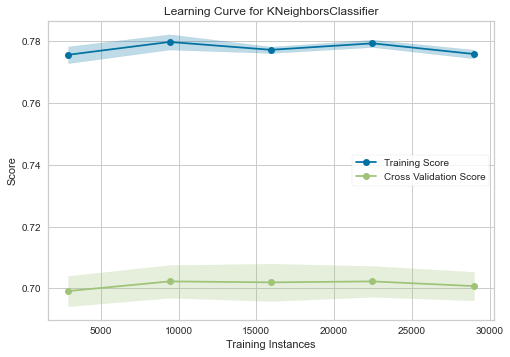

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
from yellowbrick.model_selection import learning_curve

model = KNeighborsClassifier(n_neighbors=5, leaf_size=20, weights='uniform')
print(learning_curve(model, X_train, y_train, cv=10, scoring='accuracy'))
print(learning_curve(model, X_train, y_train, cv=10, scoring='balanced_accuracy'))

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=931, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))

y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [64]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
504/504 [==============================] - 2s 1ms/step - loss: 10.8064 - accuracy: 0.7126
Epoch 2/100
504/504 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.7409
Epoch 3/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5759 - accuracy: 0.7462
Epoch 4/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5683 - accuracy: 0.7465
Epoch 5/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5687 - accuracy: 0.7444
Epoch 6/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5685 - accuracy: 0.7444
Epoch 7/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5676 - accuracy: 0.7452
Epoch 8/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5661 - accuracy: 0.7466
Epoch 9/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5725 - accuracy: 0.7406
Epoch 10/100
504/504 [==============================] - 1s 1ms/step - loss: 0.5675 - accur

In [70]:
df = pd.read_parquet(DATA_DIR, engine="pyarrow")
df["birth_year"] = df["birth_year"].astype(np.uint)
valid_birth_year = df["birth_year"][df["birth_year"] != 0]
mean_birth_year = round(valid_birth_year.mean())
df["birth_year"] = df["birth_year"].replace(0, mean_birth_year)
df["gender"] = df["gender"].replace({'M': 1, 'F': 0})
df.drop(columns=['birth_year'], inplace=True)
df.head()

queries  \
0  [216, 359, 12329, 3, 45, 4002, 2066, 32, 3931,...   
1                                                 []   
2                                     [23463, 18831]   
3                                  [1634, 3609, 654]   
4  [11064, 227, 623, 1301, 43999, 35411, 2492, 11...   

                                                apps  \
0  [4, 4, 25, 7, 30, 58, 16, 19, 17, 21, 10, 10, ...   
1  [129, 71, 9, 8, 11, 25, 18, 58, 6, 16, 125, 12...   
2  [9, 174, 65, 8, 63, 97, 62, 103, 61, 116, 59, ...   
3  [99, 73, 9, 8, 59, 37, 131, 3, 89, 6, 24, 16, ...   
4  [9, 8, 17, 54, 3, 25, 22, 6, 21, 7, 14, 5, 817...   

                                               games  gender  
0                                        [9151, 208]       1  
1       [460, 4939, 14, 232, 6387, 1758, 5834, 3, 2]       0  
2  [448, 723, 267, 9064, 10634, 166, 782, 224, 27...       1  
3                       [78, 2607, 478, 435, 9, 192]       1  
4                                      [1702, 1, 53]       1

In [71]:
df = pd.concat([df.pop('apps').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('games').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('queries').apply(pd.Series), df], axis=1)
df.fillna(0, inplace=True)

X, y =  df.drop(columns=["gender"]), df["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train.shape

(32216, 930)

In [81]:
model = Sequential()
model.add(Dense(100, input_dim=930, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
ohe = OneHotEncoder()

y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))

y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [82]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=64)

Epoch 1/100
338/338 [==============================] - 2s 2ms/step - loss: 25.7407 - accuracy: 0.6838 - val_loss: 0.6485 - val_accuracy: 0.7368
Epoch 2/100
338/338 [==============================] - 1s 2ms/step - loss: 0.6222 - accuracy: 0.7432 - val_loss: 0.6089 - val_accuracy: 0.7369
Epoch 3/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5889 - accuracy: 0.7503 - val_loss: 0.5943 - val_accuracy: 0.7369
Epoch 4/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5735 - accuracy: 0.7485 - val_loss: 0.5882 - val_accuracy: 0.7369
Epoch 5/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5721 - accuracy: 0.7433 - val_loss: 0.5863 - val_accuracy: 0.7369
Epoch 6/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5668 - accuracy: 0.7467 - val_loss: 0.5858 - val_accuracy: 0.7369
Epoch 7/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5663 - accuracy: 0.7466 - val_loss: 0.5859 - val_accuracy: 0.736

Epoch 58/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5628 - accuracy: 0.7496 - val_loss: 0.5840 - val_accuracy: 0.7370
Epoch 59/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7431 - val_loss: 0.5840 - val_accuracy: 0.7370
Epoch 60/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5691 - accuracy: 0.7437 - val_loss: 0.5840 - val_accuracy: 0.7370
Epoch 61/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.7481 - val_loss: 0.5840 - val_accuracy: 0.7370
Epoch 62/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5637 - accuracy: 0.7488 - val_loss: 0.5840 - val_accuracy: 0.7370
Epoch 63/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5680 - accuracy: 0.7448 - val_loss: 0.5840 - val_accuracy: 0.7370
Epoch 64/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5714 - accuracy: 0.7417 - val_loss: 0.5841 - val_accuracy:

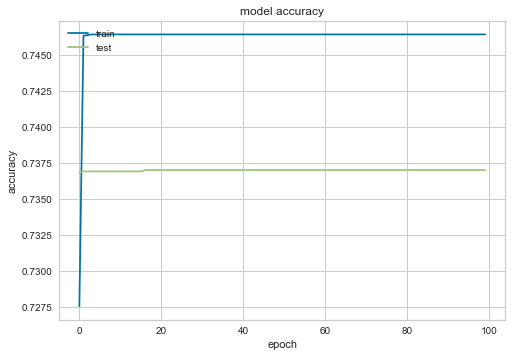

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

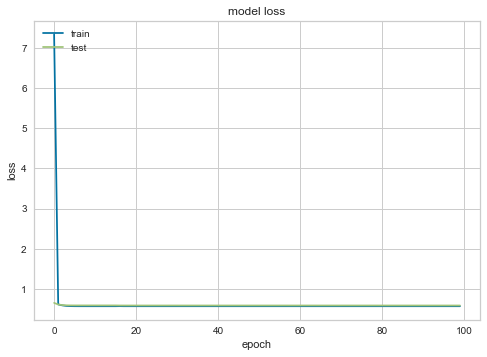

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
df = pd.read_parquet(DATA_DIR, engine="pyarrow")
df["birth_year"] = df["birth_year"].astype(np.uint)
valid_birth_year = df["birth_year"][df["birth_year"] != 0]
mean_birth_year = round(valid_birth_year.mean())
df["birth_year"] = df["birth_year"].replace(0, mean_birth_year)
df["gender"] = df["gender"].replace({'M': 1, 'F': 0})
df.drop(columns=['birth_year', 'queries'], inplace=True)
df.head()

apps  \
0  [4, 4, 25, 7, 30, 58, 16, 19, 17, 21, 10, 10, ...   
1  [129, 71, 9, 8, 11, 25, 18, 58, 6, 16, 125, 12...   
2  [9, 174, 65, 8, 63, 97, 62, 103, 61, 116, 59, ...   
3  [99, 73, 9, 8, 59, 37, 131, 3, 89, 6, 24, 16, ...   
4  [9, 8, 17, 54, 3, 25, 22, 6, 21, 7, 14, 5, 817...   

                                               games  gender  
0                                        [9151, 208]       1  
1       [460, 4939, 14, 232, 6387, 1758, 5834, 3, 2]       0  
2  [448, 723, 267, 9064, 10634, 166, 782, 224, 27...       1  
3                       [78, 2607, 478, 435, 9, 192]       1  
4                                      [1702, 1, 53]       1

In [86]:
df = pd.concat([df.pop('apps').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('games').apply(pd.Series), df], axis=1)
df.fillna(0, inplace=True)

X, y =  df.drop(columns=["gender"]), df["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = Sequential()
model.add(Dense(100, input_dim=834, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
ohe = OneHotEncoder()

y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))

y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [90]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=64)

Epoch 1/100
338/338 [==============================] - 2s 2ms/step - loss: 28.8057 - accuracy: 0.6787 - val_loss: 0.9474 - val_accuracy: 0.7367
Epoch 2/100
338/338 [==============================] - 0s 1ms/step - loss: 0.7826 - accuracy: 0.7343 - val_loss: 0.6396 - val_accuracy: 0.7371
Epoch 3/100
338/338 [==============================] - 1s 2ms/step - loss: 0.7634 - accuracy: 0.7271 - val_loss: 0.7065 - val_accuracy: 0.7369
Epoch 4/100
338/338 [==============================] - 1s 2ms/step - loss: 0.6757 - accuracy: 0.7304 - val_loss: 0.6433 - val_accuracy: 0.7369
Epoch 5/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.7367 - val_loss: 0.7294 - val_accuracy: 0.7369
Epoch 6/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7345 - val_loss: 0.5884 - val_accuracy: 0.7366
Epoch 7/100
338/338 [==============================] - 1s 2ms/step - loss: 0.6386 - accuracy: 0.7371 - val_loss: 0.6286 - val_accuracy: 0.737

Epoch 58/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7408 - val_loss: 0.5765 - val_accuracy: 0.7370
Epoch 59/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5660 - accuracy: 0.7468 - val_loss: 0.5763 - val_accuracy: 0.7370
Epoch 60/100
338/338 [==============================] - 1s 1ms/step - loss: 0.5642 - accuracy: 0.7484 - val_loss: 0.5763 - val_accuracy: 0.7370
Epoch 61/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5711 - accuracy: 0.7418 - val_loss: 0.5769 - val_accuracy: 0.7370
Epoch 62/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5686 - accuracy: 0.7444 - val_loss: 0.5765 - val_accuracy: 0.7370
Epoch 63/100
338/338 [==============================] - 1s 1ms/step - loss: 0.5630 - accuracy: 0.7494 - val_loss: 0.5763 - val_accuracy: 0.7370
Epoch 64/100
338/338 [==============================] - 1s 1ms/step - loss: 0.5651 - accuracy: 0.7475 - val_loss: 0.5763 - val_accuracy:

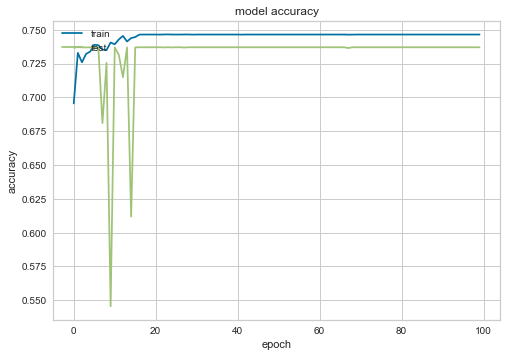

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

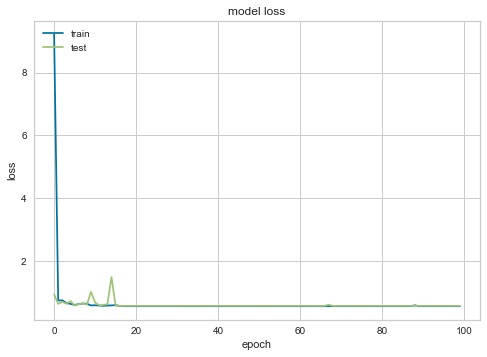

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [93]:
X_train

0       1       2       3       4       5      6       7       8    \
9391   336.0   822.0    14.0     0.0     0.0     0.0    0.0     0.0     0.0   
36089    1.0   145.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0   
38820   78.0    11.0   122.0   113.0   192.0  2726.0   34.0    44.0    17.0   
33815  771.0  3198.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0   
31187  689.0    45.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0   
...      ...     ...     ...     ...     ...     ...    ...     ...     ...   
6265    23.0   947.0    35.0   435.0  1327.0  2694.0    2.0     0.0     0.0   
11284   64.0   361.0  2093.0  2708.0  1228.0   318.0  711.0  1844.0  2392.0   
38158   35.0  4697.0     3.0    47.0     0.0     0.0    0.0     0.0     0.0   
860      0.0     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0   
15795    2.0   889.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0   

       9    ...  411  412  413  414  415  416  417  418  419  420  
9391   0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
36089  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
38820  4.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
33815  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
31187  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
6265   0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
11284  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
38158  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
860    0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
15795  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[32216 rows x 834 columns]

In [94]:
from sklearn import preprocessing

x = df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

0         1         2         3         4         5         6    \
0  0.184073  0.004199  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.009253  0.099703  0.000280  0.004739  0.130517  0.035448  0.124714   
2  0.009012  0.014595  0.005346  0.185161  0.217304  0.003347  0.016717   
3  0.001569  0.052627  0.009570  0.008886  0.000184  0.003871  0.000000   
4  0.034236  0.000020  0.001061  0.000000  0.000000  0.000000  0.000000   

        7         8         9    ...  825  826  827  828  829  830  831  832  \
0  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.000060  0.000040  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.004492  0.005472  0.082066  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.000000  0.000000  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   833  834  
0  0.0  1.0  
1  0.0  0.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0  

[5 rows x 835 columns]

In [95]:
model = Sequential()
model.add(Dense(100, input_dim=834, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
ohe = OneHotEncoder()

y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))

y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [97]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=64)

Epoch 1/100
338/338 [==============================] - 2s 2ms/step - loss: 5.5669 - accuracy: 0.4944 - val_loss: 0.7017 - val_accuracy: 0.5006
Epoch 2/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5091 - val_loss: 0.6960 - val_accuracy: 0.5001
Epoch 3/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4909 - val_loss: 0.6961 - val_accuracy: 0.4999
Epoch 4/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6959 - val_accuracy: 0.5001
Epoch 5/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.4974 - val_loss: 0.6951 - val_accuracy: 0.4999
Epoch 6/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4955 - val_loss: 0.6984 - val_accuracy: 0.4999
Epoch 7/100
338/338 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.5008 - val_loss: 0.6986 - val_accuracy: 0.5000

Epoch 58/100
338/338 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6961 - val_accuracy: 0.4999
Epoch 59/100
338/338 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 60/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 61/100
338/338 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.5024 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 62/100
338/338 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6961 - val_accuracy: 0.5000
Epoch 63/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6961 - val_accuracy: 0.4999
Epoch 64/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6961 - val_accuracy:

As it was expected it is not a good idea to normalize columns.

In [101]:
print((X_train[0] == 0).sum())
print((X_train[10] == 0).sum())
print((X_train[100] == 0).sum())
print((X_train[400] == 0).sum())

0    6813
0       0
dtype: int64
10    28302
10       28
dtype: int64
100    32171
100    30621
dtype: int64
400    32215
400    32215
dtype: int64


In [34]:
df = pd.read_parquet(DATA_DIR, engine="pyarrow")
df["birth_year"] = df["birth_year"].astype(np.uint)
valid_birth_year = df["birth_year"][df["birth_year"] != 0]
mean_birth_year = round(valid_birth_year.mean())
df["birth_year"] = df["birth_year"].replace(0, mean_birth_year)
df["gender"] = df["gender"].replace({'M': 1, 'F': 0})
df.drop(columns=['birth_year'], inplace=True)
df.head()

queries  \
0  [216, 359, 12329, 3, 45, 4002, 2066, 32, 3931,...   
1                                                 []   
2                                     [23463, 18831]   
3                                  [1634, 3609, 654]   
4  [11064, 227, 623, 1301, 43999, 35411, 2492, 11...   

                                                apps  \
0  [4, 4, 25, 7, 30, 58, 16, 19, 17, 21, 10, 10, ...   
1  [129, 71, 9, 8, 11, 25, 18, 58, 6, 16, 125, 12...   
2  [9, 174, 65, 8, 63, 97, 62, 103, 61, 116, 59, ...   
3  [99, 73, 9, 8, 59, 37, 131, 3, 89, 6, 24, 16, ...   
4  [9, 8, 17, 54, 3, 25, 22, 6, 21, 7, 14, 5, 817...   

                                               games  gender  
0                                        [9151, 208]       1  
1       [460, 4939, 14, 232, 6387, 1758, 5834, 3, 2]       0  
2  [448, 723, 267, 9064, 10634, 166, 782, 224, 27...       1  
3                       [78, 2607, 478, 435, 9, 192]       1  
4                                      [1702, 1, 53]       1

In [35]:
df = pd.concat([df.pop('apps').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('games').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('queries').apply(pd.Series), df], axis=1)

In [36]:
df.head()

0        1        2       3        4        5       6      7       8  \
0    216.0    359.0  12329.0     3.0     45.0   4002.0  2066.0   32.0  3931.0   
1      NaN      NaN      NaN     NaN      NaN      NaN     NaN    NaN     NaN   
2  23463.0  18831.0      NaN     NaN      NaN      NaN     NaN    NaN     NaN   
3   1634.0   3609.0    654.0     NaN      NaN      NaN     NaN    NaN     NaN   
4  11064.0    227.0    623.0  1301.0  43999.0  35411.0  2492.0  112.0  1652.0   

         9  ...  412  413  414  415  416  417  418  419  420  gender  
0  17104.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       1  
1      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0  
2      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       1  
3      NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       1  
4  27068.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       1  

[5 rows x 931 columns]

In [37]:
df.isnull().mean()

0         0.017407
1         0.041643
2         0.070373
3         0.098036
4         0.127312
            ...   
417       0.999975
418       0.999975
419       0.999975
420       0.999975
gender    0.000000
Length: 931, dtype: float64

In [38]:
df.columns[df.isnull().mean() < 0.8]

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
             62,       63,       64,       65,       66,       67,       68,
             69,       70, 'gender'],
      dtype='object', length=119)

In [39]:
df = df[df.columns[df.isnull().mean() < 0.8]]

In [40]:
df.shape

(40271, 355)

In [50]:
df.fillna(0, inplace=True)

In [51]:
X, y =  df.drop(columns=["gender"]), df["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
ohe = OneHotEncoder()

y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))

y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [53]:
model = Sequential()
model.add(Dense(100, input_dim=354, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=64)

Epoch 1/100
338/338 [==============================] - 2s 2ms/step - loss: 18.2793 - accuracy: 0.7150 - val_loss: 0.6518 - val_accuracy: 0.7369
Epoch 2/100
338/338 [==============================] - 1s 1ms/step - loss: 0.6233 - accuracy: 0.7420 - val_loss: 0.6184 - val_accuracy: 0.7369
Epoch 3/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.7486 - val_loss: 0.6030 - val_accuracy: 0.7369
Epoch 4/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5746 - accuracy: 0.7490 - val_loss: 0.5927 - val_accuracy: 0.7370
Epoch 5/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7436 - val_loss: 0.5894 - val_accuracy: 0.7369
Epoch 6/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5683 - accuracy: 0.7454 - val_loss: 0.5888 - val_accuracy: 0.7369
Epoch 7/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5630 - accuracy: 0.7497 - val_loss: 0.5888 - val_accuracy: 0.736

Epoch 58/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5696 - accuracy: 0.7432 - val_loss: 0.5890 - val_accuracy: 0.7369
Epoch 59/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.7519 - val_loss: 0.5889 - val_accuracy: 0.7369
Epoch 60/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.7516 - val_loss: 0.5889 - val_accuracy: 0.7369
Epoch 61/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5664 - accuracy: 0.7463 - val_loss: 0.5890 - val_accuracy: 0.7369
Epoch 62/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.7478 - val_loss: 0.5889 - val_accuracy: 0.7369
Epoch 63/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5684 - accuracy: 0.7443 - val_loss: 0.5890 - val_accuracy: 0.7369
Epoch 64/100
338/338 [==============================] - 1s 2ms/step - loss: 0.5645 - accuracy: 0.7481 - val_loss: 0.5890 - val_accuracy:

In [56]:
df = pd.read_parquet(DATA_DIR, engine="pyarrow")
df["birth_year"] = df["birth_year"].astype(np.uint)
valid_birth_year = df["birth_year"][df["birth_year"] != 0]
mean_birth_year = round(valid_birth_year.mean())
df["birth_year"] = df["birth_year"].replace(0, mean_birth_year)
df["gender"] = df["gender"].replace({'M': 1, 'F': 0})
df.drop(columns=['birth_year'], inplace=True)
df.head()

queries  \
0  [216, 359, 12329, 3, 45, 4002, 2066, 32, 3931,...   
1                                                 []   
2                                     [23463, 18831]   
3                                  [1634, 3609, 654]   
4  [11064, 227, 623, 1301, 43999, 35411, 2492, 11...   

                                                apps  \
0  [4, 4, 25, 7, 30, 58, 16, 19, 17, 21, 10, 10, ...   
1  [129, 71, 9, 8, 11, 25, 18, 58, 6, 16, 125, 12...   
2  [9, 174, 65, 8, 63, 97, 62, 103, 61, 116, 59, ...   
3  [99, 73, 9, 8, 59, 37, 131, 3, 89, 6, 24, 16, ...   
4  [9, 8, 17, 54, 3, 25, 22, 6, 21, 7, 14, 5, 817...   

                                               games  gender  
0                                        [9151, 208]       1  
1       [460, 4939, 14, 232, 6387, 1758, 5834, 3, 2]       0  
2  [448, 723, 267, 9064, 10634, 166, 782, 224, 27...       1  
3                       [78, 2607, 478, 435, 9, 192]       1  
4                                      [1702, 1, 53]       1

In [57]:
df = pd.concat([df.pop('apps').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('games').apply(pd.Series), df], axis=1)
df = pd.concat([df.pop('queries').apply(pd.Series), df], axis=1)

In [58]:
df = df[df.columns[df.isnull().mean() < 0.7]]

In [59]:
df.fillna(0, inplace=True)

In [60]:
X, y =  df.drop(columns=["gender"]), df["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
ohe = OneHotEncoder()

y_train = np.asarray(y_train).reshape((-1,1))
y_test = np.asarray(y_test).reshape((-1,1))

y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

In [63]:
model = Sequential()
model.add(Dense(100, input_dim=291, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=64)

Epoch 1/100
338/338 [==============================] - 2s 2ms/step - loss: 30.9248 - accuracy: 0.6959 - val_loss: 0.6455 - val_accuracy: 0.7371
Epoch 2/100
338/338 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.7446 - val_loss: 0.6125 - val_accuracy: 0.7372
Epoch 3/100
338/338 [==============================] - 1s 1ms/step - loss: 0.5937 - accuracy: 0.7395 - val_loss: 0.5944 - val_accuracy: 0.7370
Epoch 4/100
338/338 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.7455 - val_loss: 0.5870 - val_accuracy: 0.7370
Epoch 5/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.7409 - val_loss: 0.5862 - val_accuracy: 0.7371
Epoch 6/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7499 - val_loss: 0.5763 - val_accuracy: 0.7370
Epoch 7/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5628 - accuracy: 0.7501 - val_loss: 0.5770 - val_accuracy: 0.737

Epoch 58/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5702 - accuracy: 0.7428 - val_loss: 0.5766 - val_accuracy: 0.7371
Epoch 59/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7447 - val_loss: 0.5765 - val_accuracy: 0.7371
Epoch 60/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5699 - accuracy: 0.7430 - val_loss: 0.5766 - val_accuracy: 0.7371
Epoch 61/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5661 - accuracy: 0.7466 - val_loss: 0.5765 - val_accuracy: 0.7371
Epoch 62/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5676 - accuracy: 0.7451 - val_loss: 0.5765 - val_accuracy: 0.7371
Epoch 63/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7437 - val_loss: 0.5765 - val_accuracy: 0.7371
Epoch 64/100
338/338 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.7440 - val_loss: 0.5765 - val_accuracy:

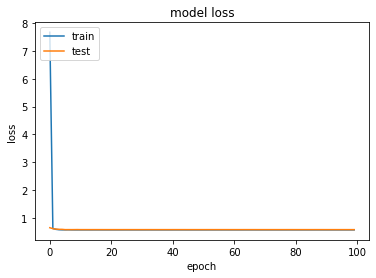

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

It seems that my model has lot of problem. Let's find it out:

In [69]:
X, y =  df.drop(columns=["gender"]), df["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
import time

LOG_DIR = f"{int(time.time())}"

In [83]:
from tensorflow import keras

def build_model(hp):
    
    model = keras.models.Sequential()
    
    model.add(Dense(hp.Int("input_units", min_value=100, max_value=500, step=20), input_dim=291, activation='relu'))
    
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Dense(hp.Int("dense_units", min_value=10, max_value=300, step=10), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [84]:
tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 1,
    executions_per_trial = 1,
    directory = LOG_DIR
)

tuner.search(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data=(X_test, y_test))

Trial 1 Complete [00h 06m 05s]
val_accuracy: 0.741651177406311

Best val_accuracy So Far: 0.741651177406311
Total elapsed time: 00h 06m 05s
INFO:tensorflow:Oracle triggered exit


In [85]:
import pickle

with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)

In [87]:
tuner = pickle.load(open("tuner_1627669198.pkl", "rb"))

In [89]:
print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())

{'input_units': 260, 'n_layers': 3, 'dense_units': 110}
Results summary
Results in 1627666980\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 260
n_layers: 3
dense_units: 110
Score: 0.741651177406311
None


In [93]:
model = tuner.get_best_models()[0]
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.6063 - accuracy: 0.7459 - val_loss: 0.5990 - val_accuracy: 0.7366
Epoch 2/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5933 - accuracy: 0.7462 - val_loss: 0.5815 - val_accuracy: 0.7371
Epoch 3/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5665 - accuracy: 0.7464 - val_loss: 0.5813 - val_accuracy: 0.7371
Epoch 4/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.6328 - accuracy: 0.7460 - val_loss: 0.5855 - val_accuracy: 0.7368
Epoch 5/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5790 - accuracy: 0.7463 - val_loss: 0.5761 - val_accuracy: 0.7370
Epoch 6/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5666 - accuracy: 0.7464 - val_loss: 0.5765 - val_accuracy: 0.7370
Epoch 7/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5668 - accuracy: 0.7464 - val_loss: 0.5762 - val_ac

2159/2159 [==============================] - 4s 2ms/step - loss: 0.5664 - accuracy: 0.7464 - val_loss: 0.5766 - val_accuracy: 0.7370
Epoch 84/100
2159/2159 [==============================] - 4s 2ms/step - loss: 0.5664 - accuracy: 0.7464 - val_loss: 0.5767 - val_accuracy: 0.7370
Epoch 85/100
2159/2159 [==============================] - 4s 2ms/step - loss: 0.5663 - accuracy: 0.7464 - val_loss: 0.5773 - val_accuracy: 0.7370
Epoch 86/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5664 - accuracy: 0.7464 - val_loss: 0.5762 - val_accuracy: 0.7370
Epoch 87/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5663 - accuracy: 0.7464 - val_loss: 0.5771 - val_accuracy: 0.7370
Epoch 88/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5663 - accuracy: 0.7464 - val_loss: 0.5762 - val_accuracy: 0.7370
Epoch 89/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5664 - accuracy: 0.7464 - val_loss: 0.5767 - val_accuracy

Accuracy is not changing one reason can be because of `optimizer`

In [100]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01)

def build_model2(hp):
    
    model = keras.models.Sequential()
    
    model.add(Dense(hp.Int("input_units", min_value=100, max_value=500, step=20), input_dim=291, activation='relu'))
    
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Dense(hp.Int("dense_units", min_value=10, max_value=300, step=10), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [102]:
LOG_DIR = f"{int(time.time())}"

tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 1,
    executions_per_trial = 1,
    directory = LOG_DIR
)

tuner.search(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data=(X_test, y_test))

Trial 1 Complete [00h 06m 33s]
val_accuracy: 0.741651177406311

Best val_accuracy So Far: 0.741651177406311
Total elapsed time: 00h 06m 33s
INFO:tensorflow:Oracle triggered exit


In [103]:
with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)

In [104]:
tuner = pickle.load(open("tuner_1627670879.pkl", "rb"))

In [105]:
print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())

{'input_units': 140, 'n_layers': 3, 'dense_units': 170}
Results summary
Results in 1627670169\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 140
n_layers: 3
dense_units: 170
Score: 0.741651177406311
None


In [119]:
model = tuner.get_best_models()[0]
history = model.fit(X_train, y_train, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5675 - accuracy: 0.7463 - val_loss: 0.5761 - val_accuracy: 0.7371
Epoch 2/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5686 - accuracy: 0.7463 - val_loss: 0.5762 - val_accuracy: 0.7371
Epoch 3/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5704 - accuracy: 0.7462 - val_loss: 0.5762 - val_accuracy: 0.7370
Epoch 4/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5711 - accuracy: 0.7463 - val_loss: 0.5763 - val_accuracy: 0.7370
Epoch 5/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5666 - accuracy: 0.7464 - val_loss: 0.5762 - val_accuracy: 0.7370
Epoch 6/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5668 - accuracy: 0.7464 - val_loss: 0.5762 - val_accuracy: 0.7370
Epoch 7/100
2159/2159 [==============================] - 3s 1ms/step - loss: 0.5668 - accuracy: 0.7464 - val_loss: 0.5763 - val_ac

In [126]:
predicted = model.predict_classes(X_test)
evaluate(predicted, y_test)

C:\Users\TheRealRondon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.741651148355059
Balanced Accuracy:  0.5
Precision:  0.741651148355059
Recall:  1.0
F1:  0.8516644094375936


In [127]:
count_0_predicted = 0
count_1_predicted = 0
count_0_actual = 0
count_1_actual = 0
for i in range(len(predicted)):
    if predicted[i] == 0:
        count_0_predicted += 1
    else:
        count_1_predicted += 1
    if y_test.iloc[i] == 0:
        count_0_actual += 1
    else:
        count_1_actual += 1
print(f"There {count_0_predicted} 0 values in prediction.")
print(f"There {count_1_predicted} 1 values in prediction.")

print(f"There {count_0_actual} 0 values in test dataset.")
print(f"There {count_1_actual} 1 values in test dataset.")

There 0 0 values in prediction.
There 8055 1 values in prediction.
There 2081 0 values in test dataset.
There 5974 1 values in test dataset.


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=0, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_score(model, X_train, y_train, cv=10)

array([0.74301676, 0.74518932, 0.74239603, 0.74239603, 0.74332713,
       0.74208566, 0.74262651, 0.74293698, 0.74293698, 0.74138466])

In [110]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [113]:
evaluate(predicted, y_test)

Accuracy:  0.7415270018621974
Balanced Accuracy:  0.5017951810078175
Precision:  0.7423412204234122
Recall:  0.9978239035821895
F1:  0.8513281919451585


In [118]:
count_0_predicted = 0
count_1_predicted = 0
count_0_actual = 0
count_1_actual = 0
for i in range(len(predicted)):
    if predicted[i] == 0:
        count_0_predicted += 1
    else:
        count_1_predicted += 1
    if y_test.iloc[i] == 0:
        count_0_actual += 1
    else:
        count_1_actual += 1
print(f"There {count_0_predicted} 0 values in prediction.")
print(f"There {count_1_predicted} 1 values in prediction.")

print(f"There {count_0_actual} 0 values in test dataset.")
print(f"There {count_1_actual} 1 values in test dataset.")

There 25 0 values in prediction.
There 8030 1 values in prediction.
There 2081 0 values in test dataset.
There 5974 1 values in test dataset.


In [7]:
df.drop(columns=['birth_year'], inplace=True)
df["gender"] = df["gender"].replace({'M': 1, 'F': 0})
df.head()

queries  \
0  [216, 359, 12329, 3, 45, 4002, 2066, 32, 3931,...   
1                                                 []   
2                                     [23463, 18831]   
3                                  [1634, 3609, 654]   
4  [11064, 227, 623, 1301, 43999, 35411, 2492, 11...   

                                                apps  \
0  [4, 4, 25, 7, 30, 58, 16, 19, 17, 21, 10, 10, ...   
1  [129, 71, 9, 8, 11, 25, 18, 58, 6, 16, 125, 12...   
2  [9, 174, 65, 8, 63, 97, 62, 103, 61, 116, 59, ...   
3  [99, 73, 9, 8, 59, 37, 131, 3, 89, 6, 24, 16, ...   
4  [9, 8, 17, 54, 3, 25, 22, 6, 21, 7, 14, 5, 817...   

                                               games  gender  
0                                        [9151, 208]       1  
1       [460, 4939, 14, 232, 6387, 1758, 5834, 3, 2]       0  
2  [448, 723, 267, 9064, 10634, 166, 782, 224, 27...       1  
3                       [78, 2607, 478, 435, 9, 192]       1  
4                                      [1702, 1, 53]       1

In [6]:
from sklearn.model_selection import train_test_split

X, y =  df.drop(columns=["gender"]), df["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

queries  \
9391                          [2504, 30655, 32035, 3, 4]   
36089  [1400, 4, 9, 18236, 16200, 10739, 9713, 70, 14...   
38820  [5327, 12, 3, 10462, 30102, 921, 1247, 6869, 7...   
33815                    [479, 1717, 1205, 875, 3570, 4]   
31187                [163, 18284, 143, 1082, 258, 28721]   
...                                                  ...   
6265            [824, 197, 42, 259, 4127, 894, 719, 344]   
11284  [1565, 712, 24838, 39622, 20862, 22, 238, 599,...   
38158  [4118, 12355, 723, 41687, 1678, 30560, 184, 85...   
860    [134, 12, 16458, 459, 118, 13249, 241, 10469, ...   
15795  [12904, 2555, 39, 976, 3716, 10283, 10193, 102...   

                                                    apps  \
9391   [9, 10, 10, 39, 17, 3, 21, 12, 7, 41, 58, 6, 1...   
36089  [9, 8, 10, 10, 39, 17, 48, 54, 3, 25, 22, 6, 2...   
38820  [9, 17, 3, 25, 22, 6, 21, 7, 14, 23, 2, 19, 10...   
33815  [73, 9, 8, 59, 37, 131, 3, 89, 6, 16, 85, 12, ...   
31187  [25, 71, 125, 16, 7, 5, 10, 10, 48, 3, 79, 47,...   
...                                                  ...   
6265   [9, 8, 105, 10, 10, 17, 54, 3, 25, 95, 22, 6, ...   
11284  [9, 8, 105, 10, 10, 39, 17, 3, 25, 22, 6, 24, ...   
38158  [9, 8, 17, 3, 25, 22, 6, 21, 7, 14, 5, 23, 2, ...   
860    [9, 8, 17, 3, 25, 22, 6, 24, 21, 7, 14, 5, 23,...   
15795  [9, 8, 105, 10, 10, 39, 17, 3, 25, 22, 6, 24, ...   

                                                   games  
9391                                      [336, 822, 14]  
36089                                           [1, 145]  
38820  [78, 11, 122, 113, 192, 2726, 34, 44, 17, 4, 9...  
33815                                        [771, 3198]  
31187                                          [689, 45]  
...                                                  ...  
6265                   [23, 947, 35, 435, 1327, 2694, 2]  
11284  [64, 361, 2093, 2708, 1228, 318, 711, 1844, 2392]  
38158                                  [35, 4697, 3, 47]  
860                                                   []  
15795                                           [2, 889]  

[32216 rows x 3 columns]

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=0, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [5]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [6]:
queries = to_1D(df['queries'])
apps = to_1D(df['apps'])
games = to_1D(df['games'])

queries_value_count = queries.value_counts()
games_value_count = games.value_counts()
apps_value_count = apps.value_counts()

In [10]:
features = dict()

for query in queries:
    if (queries_value_count[query] > len(df) * 0.05):
        features[f"q{query}"] = 0 
print("Queries completed")
for app in apps:
    if (apps_value_count[app] > len(df) * 0.05):
        features[f"a{app}"] = 0
print("Apps completed")
for game in games:
    if (games_value_count[game] > len(df) * 0.05):
        features[f"g{game}"] = 0
print("Games completed")
    
features["gender"] = 0

Queries completed
Apps completed
Games completed


In [7]:
def check_key(dict, key):
    if key in dict.keys():
        return True
    else:
        return False

In [12]:
import copy
from tqdm import tqdm

new_dataset = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    new_item = copy.copy(features)
    for query in row['queries']:
        if check_key(new_item, f"q{query}"):
            new_item[f"q{query}"] = 1
    for game in row['games']:
        if check_key(new_item, f"g{game}"):
            new_item[f"g{game}"] = 1
    for app in row['apps']:
        if check_key(new_item, f"a{app}"):
            new_item[f"a{app}"] = 1
    new_item['gender'] = row['gender']
    assert len(new_item) == len(features), "Featues count error"
    new_dataset.append(copy.copy(new_item))

100%|██████████████████████████████████████████████████████████████████████████| 40271/40271 [00:05<00:00, 8037.25it/s]


In [13]:
new_df = pd.DataFrame.from_dict(new_dataset, orient='columns')
new_df.head()

q3  q1  q15  q2  q12  q8  q40  q21  q27  q13  ...  a33  a152  g3  g2  g9  \
0   1   1    1   1    1   1    1    1    0    0  ...    0     0   0   0   0   
1   0   0    0   0    0   0    0    0    0    0  ...    0     0   1   1   0   
2   0   0    0   0    0   0    0    0    0    0  ...    0     0   0   0   0   
3   0   0    0   0    0   0    0    0    0    0  ...    0     0   0   0   1   
4   0   0    0   0    0   0    0    0    1    1  ...    0     0   0   0   0   

   g1  g16  g4  g5  gender  
0   0    0   0   0       1  
1   0    0   0   0       0  
2   0    0   0   0       1  
3   0    0   0   0       1  
4   1    0   0   0       1  

[5 rows x 220 columns]

In [14]:
from sklearn.model_selection import train_test_split

X, y =  new_df.drop(columns=["gender"]), new_df["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=0, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_score(model, X_train, y_train, cv=10)

array([0.80633147, 0.81315953, 0.81750466, 0.80726257, 0.80819367,
       0.82091868, 0.80565042, 0.81527476, 0.81837939, 0.80844458])

In [15]:
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [18]:
evaluate(predicted, y_test)

Accuracy:  0.8120422098075729
Balanced Accuracy:  0.6615974203126249
Precision:  0.8112786152987158
Recall:  0.9728824907934382
F1:  0.8847617597807885


In [18]:
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01)

def build_model(hp):
    model = keras.models.Sequential()
    
    model.add(Dense(hp.Int("input_units", min_value=100, max_value=500, step=20), input_dim=219, activation='relu'))
    
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f"dense_units_{i}", min_value=10, max_value=300, step=10), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [20]:
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
import time

LOG_DIR = f"{int(time.time())}"

tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 1,
    executions_per_trial = 1,
    directory = LOG_DIR
)

tuner.search(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data=(X_test, y_test))

Trial 1 Complete [00h 04m 54s]
val_accuracy: 0.8227187991142273

Best val_accuracy So Far: 0.8227187991142273
Total elapsed time: 00h 04m 54s
INFO:tensorflow:Oracle triggered exit


In [23]:
with open(f"tuner_{int(time.time())}.pkl", "wb") as f:
    pickle.dump(tuner, f)

In [19]:
tuner = pickle.load(open("tuner_1627738330.pkl", "rb"))

In [20]:
print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())

{'input_units': 280, 'n_layers': 8, 'dense_units_0': 30, 'dense_units_1': 10, 'dense_units_2': 10, 'dense_units_3': 10, 'dense_units_4': 10, 'dense_units_5': 10, 'dense_units_6': 10, 'dense_units_7': 10}
Results summary
Results in 1627737908\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 280
n_layers: 8
dense_units_0: 30
dense_units_1: 10
dense_units_2: 10
dense_units_3: 10
dense_units_4: 10
dense_units_5: 10
dense_units_6: 10
dense_units_7: 10
Score: 0.8227187991142273
None


In [37]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = tuner.get_best_models()[0]
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=10, callbacks=[callback])

Epoch 1/100
2900/2900 [==============================] - 3s 869us/step - loss: 0.3878 - accuracy: 0.8319 - val_loss: 0.3908 - val_accuracy: 0.8312
Epoch 2/100
2900/2900 [==============================] - 2s 827us/step - loss: 0.3822 - accuracy: 0.8360 - val_loss: 0.3909 - val_accuracy: 0.8274
Epoch 3/100
2900/2900 [==============================] - 2s 843us/step - loss: 0.3769 - accuracy: 0.8384 - val_loss: 0.4322 - val_accuracy: 0.8060
Epoch 4/100
2900/2900 [==============================] - 2s 831us/step - loss: 0.3697 - accuracy: 0.8432 - val_loss: 0.4084 - val_accuracy: 0.8191


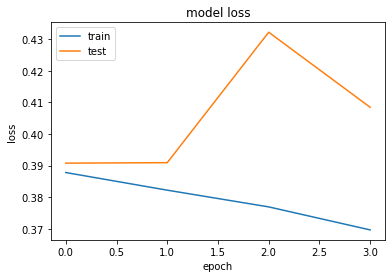

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
predicted = model.predict_classes(X_test)
evaluate(predicted, y_test)

C:\Users\TheRealRondon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.810552451893234
Balanced Accuracy:  0.7355915759899496
Precision:  0.8590571520826606
Recall:  0.8906930030130565
F1:  0.8745890861275476


In [32]:
count_0_predicted = 0
count_1_predicted = 0
count_0_actual = 0
count_1_actual = 0
for i in range(len(predicted)):
    if predicted[i] == 0:
        count_0_predicted += 1
    else:
        count_1_predicted += 1
    if y_test.iloc[i] == 0:
        count_0_actual += 1
    else:
        count_1_actual += 1
print(f"There {count_0_predicted} 0 values in prediction.")
print(f"There {count_1_predicted} 1 values in prediction.")

print(f"There {count_0_actual} 0 values in test dataset.")
print(f"There {count_1_actual} 1 values in test dataset.")

There 1969 0 values in prediction.
There 6086 1 values in prediction.
There 2081 0 values in test dataset.
There 5974 1 values in test dataset.


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = { 'n_neighbors': [3, 5, 7, 9, 15, 19, 25, 35, 55,75, 99],
                'leaf_size': [20, 30, 50, 70],
              'weights': ['uniform', 'distance']
                 }

model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=parameters, verbose=10, scoring="balanced_accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV 1/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 1/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.589 total time=   2.1s
[CV 2/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 2/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.581 total time=   2.1s
[CV 3/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 3/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.589 total time=   2.1s
[CV 4/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 4/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.590 total time=   2.1s
[CV 5/5; 1/88] START leaf_size=20, n_neighbors=3, weights=uniform...............
[CV 5/5; 1/88] END leaf_size=20, n_neighbors=3, weights=uniform;, score=0.581 total time=   2.0s
[CV 1/5; 2/88] START leaf_size=20, n_neighbors=3

[CV 2/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.563 total time=   2.4s
[CV 3/5; 10/88] START leaf_size=20, n_neighbors=15, weights=distance............
[CV 3/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.578 total time=   2.6s
[CV 4/5; 10/88] START leaf_size=20, n_neighbors=15, weights=distance............
[CV 4/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.568 total time=   2.7s
[CV 5/5; 10/88] START leaf_size=20, n_neighbors=15, weights=distance............
[CV 5/5; 10/88] END leaf_size=20, n_neighbors=15, weights=distance;, score=0.567 total time=   2.8s
[CV 1/5; 11/88] START leaf_size=20, n_neighbors=19, weights=uniform.............
[CV 1/5; 11/88] END leaf_size=20, n_neighbors=19, weights=uniform;, score=0.560 total time=   2.7s
[CV 2/5; 11/88] START leaf_size=20, n_neighbors=19, weights=uniform.............
[CV 2/5; 11/88] END leaf_size=20, n_neighbors=19, weights=uniform;, score=0.556 total time=   2.

[CV 3/5; 19/88] END leaf_size=20, n_neighbors=75, weights=uniform;, score=0.529 total time=   2.7s
[CV 4/5; 19/88] START leaf_size=20, n_neighbors=75, weights=uniform.............
[CV 4/5; 19/88] END leaf_size=20, n_neighbors=75, weights=uniform;, score=0.533 total time=   2.8s
[CV 5/5; 19/88] START leaf_size=20, n_neighbors=75, weights=uniform.............
[CV 5/5; 19/88] END leaf_size=20, n_neighbors=75, weights=uniform;, score=0.524 total time=   2.7s
[CV 1/5; 20/88] START leaf_size=20, n_neighbors=75, weights=distance............
[CV 1/5; 20/88] END leaf_size=20, n_neighbors=75, weights=distance;, score=0.528 total time=   2.6s
[CV 2/5; 20/88] START leaf_size=20, n_neighbors=75, weights=distance............
[CV 2/5; 20/88] END leaf_size=20, n_neighbors=75, weights=distance;, score=0.525 total time=   2.6s
[CV 3/5; 20/88] START leaf_size=20, n_neighbors=75, weights=distance............
[CV 3/5; 20/88] END leaf_size=20, n_neighbors=75, weights=distance;, score=0.529 total time=   2.8

[CV 4/5; 28/88] END leaf_size=30, n_neighbors=7, weights=distance;, score=0.585 total time=   2.5s
[CV 5/5; 28/88] START leaf_size=30, n_neighbors=7, weights=distance.............
[CV 5/5; 28/88] END leaf_size=30, n_neighbors=7, weights=distance;, score=0.583 total time=   2.6s
[CV 1/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 1/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.575 total time=   2.7s
[CV 2/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 2/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.572 total time=   2.5s
[CV 3/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 3/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.581 total time=   2.7s
[CV 4/5; 29/88] START leaf_size=30, n_neighbors=9, weights=uniform..............
[CV 4/5; 29/88] END leaf_size=30, n_neighbors=9, weights=uniform;, score=0.584 total time=   2.6s
[CV 5

[CV 5/5; 37/88] END leaf_size=30, n_neighbors=35, weights=uniform;, score=0.550 total time=   2.8s
[CV 1/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 1/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.547 total time=   2.7s
[CV 2/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 2/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.546 total time=   2.6s
[CV 3/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 3/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.554 total time=   2.6s
[CV 4/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 4/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.547 total time=   2.6s
[CV 5/5; 38/88] START leaf_size=30, n_neighbors=35, weights=distance............
[CV 5/5; 38/88] END leaf_size=30, n_neighbors=35, weights=distance;, score=0.550 total time=   2

[CV 1/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.592 total time=   2.7s
[CV 2/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 2/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.577 total time=   2.6s
[CV 3/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 3/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.589 total time=   2.7s
[CV 4/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 4/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.588 total time=   2.7s
[CV 5/5; 47/88] START leaf_size=50, n_neighbors=5, weights=uniform..............
[CV 5/5; 47/88] END leaf_size=50, n_neighbors=5, weights=uniform;, score=0.585 total time=   2.7s
[CV 1/5; 48/88] START leaf_size=50, n_neighbors=5, weights=distance.............
[CV 1/5; 48/88] END leaf_size=50, n_neighbors=5, weights=distance;, score=0.592 total time=   2.5s
[CV 2/

[CV 2/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.556 total time=   2.6s
[CV 3/5; 56/88] START leaf_size=50, n_neighbors=19, weights=distance............
[CV 3/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.567 total time=   2.9s
[CV 4/5; 56/88] START leaf_size=50, n_neighbors=19, weights=distance............
[CV 4/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.563 total time=   3.0s
[CV 5/5; 56/88] START leaf_size=50, n_neighbors=19, weights=distance............
[CV 5/5; 56/88] END leaf_size=50, n_neighbors=19, weights=distance;, score=0.560 total time=   2.9s
[CV 1/5; 57/88] START leaf_size=50, n_neighbors=25, weights=uniform.............
[CV 1/5; 57/88] END leaf_size=50, n_neighbors=25, weights=uniform;, score=0.556 total time=   2.8s
[CV 2/5; 57/88] START leaf_size=50, n_neighbors=25, weights=uniform.............
[CV 2/5; 57/88] END leaf_size=50, n_neighbors=25, weights=uniform;, score=0.550 total time=   2.

[CV 3/5; 65/88] END leaf_size=50, n_neighbors=99, weights=uniform;, score=0.523 total time=   2.8s
[CV 4/5; 65/88] START leaf_size=50, n_neighbors=99, weights=uniform.............
[CV 4/5; 65/88] END leaf_size=50, n_neighbors=99, weights=uniform;, score=0.526 total time=   2.9s
[CV 5/5; 65/88] START leaf_size=50, n_neighbors=99, weights=uniform.............
[CV 5/5; 65/88] END leaf_size=50, n_neighbors=99, weights=uniform;, score=0.520 total time=   2.8s
[CV 1/5; 66/88] START leaf_size=50, n_neighbors=99, weights=distance............
[CV 1/5; 66/88] END leaf_size=50, n_neighbors=99, weights=distance;, score=0.524 total time=   2.6s
[CV 2/5; 66/88] START leaf_size=50, n_neighbors=99, weights=distance............
[CV 2/5; 66/88] END leaf_size=50, n_neighbors=99, weights=distance;, score=0.523 total time=   2.6s
[CV 3/5; 66/88] START leaf_size=50, n_neighbors=99, weights=distance............
[CV 3/5; 66/88] END leaf_size=50, n_neighbors=99, weights=distance;, score=0.523 total time=   2.7

[CV 4/5; 74/88] END leaf_size=70, n_neighbors=9, weights=distance;, score=0.584 total time=   2.8s
[CV 5/5; 74/88] START leaf_size=70, n_neighbors=9, weights=distance.............
[CV 5/5; 74/88] END leaf_size=70, n_neighbors=9, weights=distance;, score=0.580 total time=   2.6s
[CV 1/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 1/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.569 total time=   2.8s
[CV 2/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 2/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.563 total time=   2.8s
[CV 3/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 3/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.578 total time=   2.8s
[CV 4/5; 75/88] START leaf_size=70, n_neighbors=15, weights=uniform.............
[CV 4/5; 75/88] END leaf_size=70, n_neighbors=15, weights=uniform;, score=0.568 total time=   2.7s
[

[CV 5/5; 83/88] END leaf_size=70, n_neighbors=55, weights=uniform;, score=0.532 total time=   2.8s
[CV 1/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 1/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.533 total time=   2.7s
[CV 2/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 2/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.535 total time=   2.5s
[CV 3/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 3/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.540 total time=   2.7s
[CV 4/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 4/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.538 total time=   2.7s
[CV 5/5; 84/88] START leaf_size=70, n_neighbors=55, weights=distance............
[CV 5/5; 84/88] END leaf_size=70, n_neighbors=55, weights=distance;, score=0.532 total time=   2

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 50, 70],
                         'n_neighbors': [3, 5, 7, 9, 15, 19, 25, 35, 55, 75,
                                         99],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy', verbose=10)

In [37]:
grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}

In [39]:
model = KNeighborsClassifier(leaf_size=20, n_neighbors=5, weights='distance')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
evaluate(predicted, y_test)

Accuracy:  0.7340782122905027
Balanced Accuracy:  0.5893081134700795
Precision:  0.7822628167354154
Recall:  0.8888516906595246
F1:  0.8321579689703809


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {  'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'tol': [1e-3, 1e-4, 1e-5],
                'max_iter': [50, 100, 150, 200]
                 }

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=parameters, verbose=10, scoring="balanced_accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_iter=50, penalty=l1, tol=0.001.........................
[CV 1/5; 1/48] END max_iter=50, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 1/48] START max_iter=50, penalty=l1, tol=0.001.........................
[CV 2/5; 1/48] END max_iter=50, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 1/48] START max_iter=50, penalty=l1, tol=0.001.........................
[CV 3/5; 1/48] END max_iter=50, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 1/48] START max_iter=50, penalty=l1, tol=0.001.........................
[CV 4/5; 1/48] END max_iter=50, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 1/48] START max_iter=50, penalty=l1, tol=0.001.........................
[CV 5/5; 1/48] END max_iter=50, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 2/48] START max_iter=50, penalty=l1, tol=0.0001........................
[CV 1/5; 2/48] END max_iter

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 5/5; 2/48] END max_iter=50, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 3/48] START max_iter=50, penalty=l1, tol=1e-05.........................
[CV 1/5; 3/48] END max_iter=50, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 3/48] START max_iter=50, penalty=l1, tol=1e-05.........................
[CV 2/5; 3/48] END max_iter=50, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 3/48] START max_iter=50, penalty=l1, tol=1e-05.........................
[CV 3/5; 3/48] END max_iter=50, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 3/48] START max_iter=50, penalty=l1, tol=1e-05.........................
[CV 4/5; 3/48] END max_iter=50, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 3/48] START max_iter=50, penalty=l1, tol=1e-05.........................
[CV 5/5; 3/48] END max_iter=50, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 4/48] START max_iter=50, penalty=l2, tol=0.001.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 1/5; 4/48] END max_iter=50, penalty=l2, tol=0.001;, score=0.705 total time=   0.5s
[CV 2/5; 4/48] START max_iter=50, penalty=l2, tol=0.001.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 4/48] END max_iter=50, penalty=l2, tol=0.001;, score=0.727 total time=   0.3s
[CV 3/5; 4/48] START max_iter=50, penalty=l2, tol=0.001.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 4/48] END max_iter=50, penalty=l2, tol=0.001;, score=0.719 total time=   0.3s
[CV 4/5; 4/48] START max_iter=50, penalty=l2, tol=0.001.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 4/48] END max_iter=50, penalty=l2, tol=0.001;, score=0.713 total time=   0.3s
[CV 5/5; 4/48] START max_iter=50, penalty=l2, tol=0.001.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 4/48] END max_iter=50, penalty=l2, tol=0.001;, score=0.721 total time=   0.3s
[CV 1/5; 5/48] START max_iter=50, penalty=l2, tol=0.0001........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 5/48] END max_iter=50, penalty=l2, tol=0.0001;, score=0.705 total time=   0.3s
[CV 2/5; 5/48] START max_iter=50, penalty=l2, tol=0.0001........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 5/48] END max_iter=50, penalty=l2, tol=0.0001;, score=0.727 total time=   0.3s
[CV 3/5; 5/48] START max_iter=50, penalty=l2, tol=0.0001........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 5/48] END max_iter=50, penalty=l2, tol=0.0001;, score=0.719 total time=   0.3s
[CV 4/5; 5/48] START max_iter=50, penalty=l2, tol=0.0001........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 5/48] END max_iter=50, penalty=l2, tol=0.0001;, score=0.713 total time=   0.3s
[CV 5/5; 5/48] START max_iter=50, penalty=l2, tol=0.0001........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 5/48] END max_iter=50, penalty=l2, tol=0.0001;, score=0.721 total time=   0.3s
[CV 1/5; 6/48] START max_iter=50, penalty=l2, tol=1e-05.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 6/48] END max_iter=50, penalty=l2, tol=1e-05;, score=0.705 total time=   0.3s
[CV 2/5; 6/48] START max_iter=50, penalty=l2, tol=1e-05.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 6/48] END max_iter=50, penalty=l2, tol=1e-05;, score=0.727 total time=   0.3s
[CV 3/5; 6/48] START max_iter=50, penalty=l2, tol=1e-05.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 6/48] END max_iter=50, penalty=l2, tol=1e-05;, score=0.719 total time=   0.3s
[CV 4/5; 6/48] START max_iter=50, penalty=l2, tol=1e-05.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 6/48] END max_iter=50, penalty=l2, tol=1e-05;, score=0.713 total time=   0.3s
[CV 5/5; 6/48] START max_iter=50, penalty=l2, tol=1e-05.........................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 6/48] END max_iter=50, penalty=l2, tol=1e-05;, score=0.721 total time=   0.3s
[CV 1/5; 7/48] START max_iter=50, penalty=elasticnet, tol=0.001.................
[CV 1/5; 7/48] END max_iter=50, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 7/48] START max_iter=50, penalty=elasticnet, tol=0.001.................
[CV 2/5; 7/48] END max_iter=50, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 7/48] START max_iter=50, penalty=elasticnet, tol=0.001.................
[CV 3/5; 7/48] END max_iter=50, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 7/48] START max_iter=50, penalty=elasticnet, tol=0.001.................
[CV 4/5; 7/48] END max_iter=50, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 7/48] START max_iter=50, penalty=elasticnet, tol=0.001.................
[CV 5/5; 7/48] END max_iter=50, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 8/48] START max_iter=50, penalty=e

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 1/5; 9/48] END max_iter=50, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 9/48] START max_iter=50, penalty=elasticnet, tol=1e-05.................
[CV 2/5; 9/48] END max_iter=50, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 9/48] START max_iter=50, penalty=elasticnet, tol=1e-05.................
[CV 3/5; 9/48] END max_iter=50, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 9/48] START max_iter=50, penalty=elasticnet, tol=1e-05.................
[CV 4/5; 9/48] END max_iter=50, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 9/48] START max_iter=50, penalty=elasticnet, tol=1e-05.................
[CV 5/5; 9/48] END max_iter=50, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 10/48] START max_iter=50, penalty=none, tol=0.001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 10/48] END max_iter=50, penalty=none, tol=0.001;, score=0.707 total time=   0.3s
[CV 2/5; 10/48] START max_iter=50, penalty=none, tol=0.001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 10/48] END max_iter=50, penalty=none, tol=0.001;, score=0.727 total time=   0.3s
[CV 3/5; 10/48] START max_iter=50, penalty=none, tol=0.001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 10/48] END max_iter=50, penalty=none, tol=0.001;, score=0.718 total time=   0.3s
[CV 4/5; 10/48] START max_iter=50, penalty=none, tol=0.001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 10/48] END max_iter=50, penalty=none, tol=0.001;, score=0.713 total time=   0.3s
[CV 5/5; 10/48] START max_iter=50, penalty=none, tol=0.001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 10/48] END max_iter=50, penalty=none, tol=0.001;, score=0.720 total time=   0.3s
[CV 1/5; 11/48] START max_iter=50, penalty=none, tol=0.0001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 11/48] END max_iter=50, penalty=none, tol=0.0001;, score=0.707 total time=   0.3s
[CV 2/5; 11/48] START max_iter=50, penalty=none, tol=0.0001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 11/48] END max_iter=50, penalty=none, tol=0.0001;, score=0.727 total time=   0.3s
[CV 3/5; 11/48] START max_iter=50, penalty=none, tol=0.0001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 11/48] END max_iter=50, penalty=none, tol=0.0001;, score=0.718 total time=   0.3s
[CV 4/5; 11/48] START max_iter=50, penalty=none, tol=0.0001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 11/48] END max_iter=50, penalty=none, tol=0.0001;, score=0.713 total time=   0.2s
[CV 5/5; 11/48] START max_iter=50, penalty=none, tol=0.0001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 11/48] END max_iter=50, penalty=none, tol=0.0001;, score=0.720 total time=   0.3s
[CV 1/5; 12/48] START max_iter=50, penalty=none, tol=1e-05......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 12/48] END max_iter=50, penalty=none, tol=1e-05;, score=0.707 total time=   0.3s
[CV 2/5; 12/48] START max_iter=50, penalty=none, tol=1e-05......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 12/48] END max_iter=50, penalty=none, tol=1e-05;, score=0.727 total time=   0.3s
[CV 3/5; 12/48] START max_iter=50, penalty=none, tol=1e-05......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 12/48] END max_iter=50, penalty=none, tol=1e-05;, score=0.718 total time=   0.4s
[CV 4/5; 12/48] START max_iter=50, penalty=none, tol=1e-05......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 12/48] END max_iter=50, penalty=none, tol=1e-05;, score=0.713 total time=   0.3s
[CV 5/5; 12/48] START max_iter=50, penalty=none, tol=1e-05......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 12/48] END max_iter=50, penalty=none, tol=1e-05;, score=0.720 total time=   0.3s
[CV 1/5; 13/48] START max_iter=100, penalty=l1, tol=0.001.......................
[CV 1/5; 13/48] END max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 13/48] START max_iter=100, penalty=l1, tol=0.001.......................
[CV 2/5; 13/48] END max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 13/48] START max_iter=100, penalty=l1, tol=0.001.......................
[CV 3/5; 13/48] END max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 13/48] START max_iter=100, penalty=l1, tol=0.001.......................
[CV 4/5; 13/48] END max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 13/48] START max_iter=100, penalty=l1, tol=0.001.......................
[CV 5/5; 13/48] END max_iter=100, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 14/48] START max_iter=100, penalty=l1, tol=0.0001............

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\


[CV 1/5; 15/48] END max_iter=100, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 15/48] START max_iter=100, penalty=l1, tol=1e-05.......................
[CV 2/5; 15/48] END max_iter=100, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 15/48] START max_iter=100, penalty=l1, tol=1e-05.......................
[CV 3/5; 15/48] END max_iter=100, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 15/48] START max_iter=100, penalty=l1, tol=1e-05.......................
[CV 4/5; 15/48] END max_iter=100, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 15/48] START max_iter=100, penalty=l1, tol=1e-05.......................
[CV 5/5; 15/48] END max_iter=100, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 16/48] START max_iter=100, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 16/48] END max_iter=100, penalty=l2, tol=0.001;, score=0.706 total time=   0.6s
[CV 2/5; 16/48] START max_iter=100, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 16/48] END max_iter=100, penalty=l2, tol=0.001;, score=0.726 total time=   0.7s
[CV 3/5; 16/48] START max_iter=100, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 16/48] END max_iter=100, penalty=l2, tol=0.001;, score=0.717 total time=   0.6s
[CV 4/5; 16/48] START max_iter=100, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 16/48] END max_iter=100, penalty=l2, tol=0.001;, score=0.712 total time=   0.6s
[CV 5/5; 16/48] START max_iter=100, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 16/48] END max_iter=100, penalty=l2, tol=0.001;, score=0.721 total time=   0.6s
[CV 1/5; 17/48] START max_iter=100, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 17/48] END max_iter=100, penalty=l2, tol=0.0001;, score=0.706 total time=   0.7s
[CV 2/5; 17/48] START max_iter=100, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 17/48] END max_iter=100, penalty=l2, tol=0.0001;, score=0.726 total time=   0.6s
[CV 3/5; 17/48] START max_iter=100, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 17/48] END max_iter=100, penalty=l2, tol=0.0001;, score=0.717 total time=   0.5s
[CV 4/5; 17/48] START max_iter=100, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 17/48] END max_iter=100, penalty=l2, tol=0.0001;, score=0.712 total time=   0.6s
[CV 5/5; 17/48] START max_iter=100, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 17/48] END max_iter=100, penalty=l2, tol=0.0001;, score=0.721 total time=   0.7s
[CV 1/5; 18/48] START max_iter=100, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 18/48] END max_iter=100, penalty=l2, tol=1e-05;, score=0.706 total time=   0.6s
[CV 2/5; 18/48] START max_iter=100, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 18/48] END max_iter=100, penalty=l2, tol=1e-05;, score=0.726 total time=   0.7s
[CV 3/5; 18/48] START max_iter=100, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 18/48] END max_iter=100, penalty=l2, tol=1e-05;, score=0.717 total time=   0.6s
[CV 4/5; 18/48] START max_iter=100, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 18/48] END max_iter=100, penalty=l2, tol=1e-05;, score=0.712 total time=   0.6s
[CV 5/5; 18/48] START max_iter=100, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 18/48] END max_iter=100, penalty=l2, tol=1e-05;, score=0.721 total time=   0.6s
[CV 1/5; 19/48] START max_iter=100, penalty=elasticnet, tol=0.001...............
[CV 1/5; 19/48] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 19/48] START max_iter=100, penalty=elasticnet, tol=0.001...............
[CV 2/5; 19/48] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 19/48] START max_iter=100, penalty=elasticnet, tol=0.001...............
[CV 3/5; 19/48] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 19/48] START max_iter=100, penalty=elasticnet, tol=0.001...............
[CV 4/5; 19/48] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 19/48] START max_iter=100, penalty=elasticnet, tol=0.001...............
[CV 5/5; 19/48] END max_iter=100, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 20/48] START max_iter=

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 1/5; 21/48] END max_iter=100, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 21/48] START max_iter=100, penalty=elasticnet, tol=1e-05...............
[CV 2/5; 21/48] END max_iter=100, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 21/48] START max_iter=100, penalty=elasticnet, tol=1e-05...............
[CV 3/5; 21/48] END max_iter=100, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 21/48] START max_iter=100, penalty=elasticnet, tol=1e-05...............
[CV 4/5; 21/48] END max_iter=100, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 21/48] START max_iter=100, penalty=elasticnet, tol=1e-05...............
[CV 5/5; 21/48] END max_iter=100, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 22/48] START max_iter=100, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 22/48] END max_iter=100, penalty=none, tol=0.001;, score=0.706 total time=   0.6s
[CV 2/5; 22/48] START max_iter=100, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 22/48] END max_iter=100, penalty=none, tol=0.001;, score=0.725 total time=   0.7s
[CV 3/5; 22/48] START max_iter=100, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 22/48] END max_iter=100, penalty=none, tol=0.001;, score=0.719 total time=   0.7s
[CV 4/5; 22/48] START max_iter=100, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 22/48] END max_iter=100, penalty=none, tol=0.001;, score=0.712 total time=   0.6s
[CV 5/5; 22/48] START max_iter=100, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 22/48] END max_iter=100, penalty=none, tol=0.001;, score=0.721 total time=   0.7s
[CV 1/5; 23/48] START max_iter=100, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 23/48] END max_iter=100, penalty=none, tol=0.0001;, score=0.706 total time=   0.6s
[CV 2/5; 23/48] START max_iter=100, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 23/48] END max_iter=100, penalty=none, tol=0.0001;, score=0.725 total time=   0.7s
[CV 3/5; 23/48] START max_iter=100, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 23/48] END max_iter=100, penalty=none, tol=0.0001;, score=0.719 total time=   0.7s
[CV 4/5; 23/48] START max_iter=100, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 23/48] END max_iter=100, penalty=none, tol=0.0001;, score=0.712 total time=   0.7s
[CV 5/5; 23/48] START max_iter=100, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 23/48] END max_iter=100, penalty=none, tol=0.0001;, score=0.721 total time=   0.6s
[CV 1/5; 24/48] START max_iter=100, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 24/48] END max_iter=100, penalty=none, tol=1e-05;, score=0.706 total time=   0.7s
[CV 2/5; 24/48] START max_iter=100, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 24/48] END max_iter=100, penalty=none, tol=1e-05;, score=0.725 total time=   0.6s
[CV 3/5; 24/48] START max_iter=100, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 24/48] END max_iter=100, penalty=none, tol=1e-05;, score=0.719 total time=   0.7s
[CV 4/5; 24/48] START max_iter=100, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 24/48] END max_iter=100, penalty=none, tol=1e-05;, score=0.712 total time=   0.6s
[CV 5/5; 24/48] START max_iter=100, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 24/48] END max_iter=100, penalty=none, tol=1e-05;, score=0.721 total time=   0.6s
[CV 1/5; 25/48] START max_iter=150, penalty=l1, tol=0.001.......................
[CV 1/5; 25/48] END max_iter=150, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 25/48] START max_iter=150, penalty=l1, tol=0.001.......................
[CV 2/5; 25/48] END max_iter=150, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 25/48] START max_iter=150, penalty=l1, tol=0.001.......................
[CV 3/5; 25/48] END max_iter=150, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 25/48] START max_iter=150, penalty=l1, tol=0.001.......................
[CV 4/5; 25/48] END max_iter=150, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 25/48] START max_iter=150, penalty=l1, tol=0.001.......................
[CV 5/5; 25/48] END max_iter=150, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 26/48] START max_iter=150, penalty=l1, tol=0.0001...........

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 1/5; 27/48] END max_iter=150, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 27/48] START max_iter=150, penalty=l1, tol=1e-05.......................
[CV 2/5; 27/48] END max_iter=150, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 27/48] START max_iter=150, penalty=l1, tol=1e-05.......................
[CV 3/5; 27/48] END max_iter=150, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 27/48] START max_iter=150, penalty=l1, tol=1e-05.......................
[CV 4/5; 27/48] END max_iter=150, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 27/48] START max_iter=150, penalty=l1, tol=1e-05.......................
[CV 5/5; 27/48] END max_iter=150, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 28/48] START max_iter=150, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 28/48] END max_iter=150, penalty=l2, tol=0.001;, score=0.705 total time=   0.9s
[CV 2/5; 28/48] START max_iter=150, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 28/48] END max_iter=150, penalty=l2, tol=0.001;, score=0.726 total time=   1.0s
[CV 3/5; 28/48] START max_iter=150, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 28/48] END max_iter=150, penalty=l2, tol=0.001;, score=0.718 total time=   0.9s
[CV 4/5; 28/48] START max_iter=150, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 28/48] END max_iter=150, penalty=l2, tol=0.001;, score=0.712 total time=   0.9s
[CV 5/5; 28/48] START max_iter=150, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 28/48] END max_iter=150, penalty=l2, tol=0.001;, score=0.722 total time=   1.1s
[CV 1/5; 29/48] START max_iter=150, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 29/48] END max_iter=150, penalty=l2, tol=0.0001;, score=0.705 total time=   0.9s
[CV 2/5; 29/48] START max_iter=150, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 29/48] END max_iter=150, penalty=l2, tol=0.0001;, score=0.726 total time=   0.8s
[CV 3/5; 29/48] START max_iter=150, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 29/48] END max_iter=150, penalty=l2, tol=0.0001;, score=0.718 total time=   0.9s
[CV 4/5; 29/48] START max_iter=150, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 29/48] END max_iter=150, penalty=l2, tol=0.0001;, score=0.712 total time=   0.9s
[CV 5/5; 29/48] START max_iter=150, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 29/48] END max_iter=150, penalty=l2, tol=0.0001;, score=0.722 total time=   1.0s
[CV 1/5; 30/48] START max_iter=150, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 30/48] END max_iter=150, penalty=l2, tol=1e-05;, score=0.705 total time=   1.0s
[CV 2/5; 30/48] START max_iter=150, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 30/48] END max_iter=150, penalty=l2, tol=1e-05;, score=0.726 total time=   1.0s
[CV 3/5; 30/48] START max_iter=150, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 30/48] END max_iter=150, penalty=l2, tol=1e-05;, score=0.718 total time=   0.9s
[CV 4/5; 30/48] START max_iter=150, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 30/48] END max_iter=150, penalty=l2, tol=1e-05;, score=0.712 total time=   0.9s
[CV 5/5; 30/48] START max_iter=150, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 30/48] END max_iter=150, penalty=l2, tol=1e-05;, score=0.722 total time=   1.0s
[CV 1/5; 31/48] START max_iter=150, penalty=elasticnet, tol=0.001...............
[CV 1/5; 31/48] END max_iter=150, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 31/48] START max_iter=150, penalty=elasticnet, tol=0.001...............
[CV 2/5; 31/48] END max_iter=150, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 31/48] START max_iter=150, penalty=elasticnet, tol=0.001...............
[CV 3/5; 31/48] END max_iter=150, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 31/48] START max_iter=150, penalty=elasticnet, tol=0.001...............
[CV 4/5; 31/48] END max_iter=150, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 31/48] START max_iter=150, penalty=elasticnet, tol=0.001...............
[CV 5/5; 31/48] END max_iter=150, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 32/48] START max_iter=

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon


[CV 1/5; 33/48] END max_iter=150, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 33/48] START max_iter=150, penalty=elasticnet, tol=1e-05...............
[CV 2/5; 33/48] END max_iter=150, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 33/48] START max_iter=150, penalty=elasticnet, tol=1e-05...............
[CV 3/5; 33/48] END max_iter=150, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 33/48] START max_iter=150, penalty=elasticnet, tol=1e-05...............
[CV 4/5; 33/48] END max_iter=150, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 33/48] START max_iter=150, penalty=elasticnet, tol=1e-05...............
[CV 5/5; 33/48] END max_iter=150, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 1/5; 34/48] START max_iter=150, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 34/48] END max_iter=150, penalty=none, tol=0.001;, score=0.706 total time=   0.9s
[CV 2/5; 34/48] START max_iter=150, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 34/48] END max_iter=150, penalty=none, tol=0.001;, score=0.726 total time=   0.9s
[CV 3/5; 34/48] START max_iter=150, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 34/48] END max_iter=150, penalty=none, tol=0.001;, score=0.719 total time=   0.9s
[CV 4/5; 34/48] START max_iter=150, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 34/48] END max_iter=150, penalty=none, tol=0.001;, score=0.712 total time=   0.9s
[CV 5/5; 34/48] START max_iter=150, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 34/48] END max_iter=150, penalty=none, tol=0.001;, score=0.720 total time=   0.9s
[CV 1/5; 35/48] START max_iter=150, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 35/48] END max_iter=150, penalty=none, tol=0.0001;, score=0.706 total time=   0.8s
[CV 2/5; 35/48] START max_iter=150, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 35/48] END max_iter=150, penalty=none, tol=0.0001;, score=0.726 total time=   0.8s
[CV 3/5; 35/48] START max_iter=150, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 35/48] END max_iter=150, penalty=none, tol=0.0001;, score=0.719 total time=   0.8s
[CV 4/5; 35/48] START max_iter=150, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 35/48] END max_iter=150, penalty=none, tol=0.0001;, score=0.712 total time=   0.8s
[CV 5/5; 35/48] START max_iter=150, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 35/48] END max_iter=150, penalty=none, tol=0.0001;, score=0.720 total time=   0.9s
[CV 1/5; 36/48] START max_iter=150, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 36/48] END max_iter=150, penalty=none, tol=1e-05;, score=0.706 total time=   0.9s
[CV 2/5; 36/48] START max_iter=150, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 36/48] END max_iter=150, penalty=none, tol=1e-05;, score=0.726 total time=   1.0s
[CV 3/5; 36/48] START max_iter=150, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 36/48] END max_iter=150, penalty=none, tol=1e-05;, score=0.719 total time=   0.9s
[CV 4/5; 36/48] START max_iter=150, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 36/48] END max_iter=150, penalty=none, tol=1e-05;, score=0.712 total time=   0.9s
[CV 5/5; 36/48] START max_iter=150, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 36/48] END max_iter=150, penalty=none, tol=1e-05;, score=0.720 total time=   1.1s
[CV 1/5; 37/48] START max_iter=200, penalty=l1, tol=0.001.......................
[CV 1/5; 37/48] END max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 37/48] START max_iter=200, penalty=l1, tol=0.001.......................
[CV 2/5; 37/48] END max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 37/48] START max_iter=200, penalty=l1, tol=0.001.......................
[CV 3/5; 37/48] END max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 37/48] START max_iter=200, penalty=l1, tol=0.001.......................
[CV 4/5; 37/48] END max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 37/48] START max_iter=200, penalty=l1, tol=0.001.......................
[CV 5/5; 37/48] END max_iter=200, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 38/48] START max_iter=200, penalty=l1, tol=0.0001...........

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anaconda3\lib\

[CV 4/5; 38/48] END max_iter=200, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 38/48] START max_iter=200, penalty=l1, tol=0.0001......................
[CV 5/5; 38/48] END max_iter=200, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 39/48] START max_iter=200, penalty=l1, tol=1e-05.......................
[CV 1/5; 39/48] END max_iter=200, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 39/48] START max_iter=200, penalty=l1, tol=1e-05.......................
[CV 2/5; 39/48] END max_iter=200, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 39/48] START max_iter=200, penalty=l1, tol=1e-05.......................
[CV 3/5; 39/48] END max_iter=200, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 39/48] START max_iter=200, penalty=l1, tol=1e-05.......................
[CV 4/5; 39/48] END max_iter=200, penalty=l1, tol=1e-05;, score=nan total time=   0.0s
[CV 5/5; 39/48] START max_iter=200, penalty=l1, tol=1e-05..............

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 40/48] END max_iter=200, penalty=l2, tol=0.001;, score=0.705 total time=   1.2s
[CV 2/5; 40/48] START max_iter=200, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 40/48] END max_iter=200, penalty=l2, tol=0.001;, score=0.726 total time=   1.1s
[CV 3/5; 40/48] START max_iter=200, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 40/48] END max_iter=200, penalty=l2, tol=0.001;, score=0.719 total time=   1.1s
[CV 4/5; 40/48] START max_iter=200, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 40/48] END max_iter=200, penalty=l2, tol=0.001;, score=0.712 total time=   1.1s
[CV 5/5; 40/48] START max_iter=200, penalty=l2, tol=0.001.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 40/48] END max_iter=200, penalty=l2, tol=0.001;, score=0.722 total time=   1.1s
[CV 1/5; 41/48] START max_iter=200, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 41/48] END max_iter=200, penalty=l2, tol=0.0001;, score=0.705 total time=   1.2s
[CV 2/5; 41/48] START max_iter=200, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 41/48] END max_iter=200, penalty=l2, tol=0.0001;, score=0.726 total time=   1.1s
[CV 3/5; 41/48] START max_iter=200, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 41/48] END max_iter=200, penalty=l2, tol=0.0001;, score=0.719 total time=   1.1s
[CV 4/5; 41/48] START max_iter=200, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 41/48] END max_iter=200, penalty=l2, tol=0.0001;, score=0.712 total time=   1.1s
[CV 5/5; 41/48] START max_iter=200, penalty=l2, tol=0.0001......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 41/48] END max_iter=200, penalty=l2, tol=0.0001;, score=0.722 total time=   1.3s
[CV 1/5; 42/48] START max_iter=200, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 42/48] END max_iter=200, penalty=l2, tol=1e-05;, score=0.705 total time=   1.1s
[CV 2/5; 42/48] START max_iter=200, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 42/48] END max_iter=200, penalty=l2, tol=1e-05;, score=0.726 total time=   1.4s
[CV 3/5; 42/48] START max_iter=200, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 42/48] END max_iter=200, penalty=l2, tol=1e-05;, score=0.719 total time=   1.3s
[CV 4/5; 42/48] START max_iter=200, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 42/48] END max_iter=200, penalty=l2, tol=1e-05;, score=0.712 total time=   1.2s
[CV 5/5; 42/48] START max_iter=200, penalty=l2, tol=1e-05.......................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3

[CV 5/5; 42/48] END max_iter=200, penalty=l2, tol=1e-05;, score=0.722 total time=   1.4s
[CV 1/5; 43/48] START max_iter=200, penalty=elasticnet, tol=0.001...............
[CV 1/5; 43/48] END max_iter=200, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 2/5; 43/48] START max_iter=200, penalty=elasticnet, tol=0.001...............
[CV 2/5; 43/48] END max_iter=200, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 3/5; 43/48] START max_iter=200, penalty=elasticnet, tol=0.001...............
[CV 3/5; 43/48] END max_iter=200, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 4/5; 43/48] START max_iter=200, penalty=elasticnet, tol=0.001...............
[CV 4/5; 43/48] END max_iter=200, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 5/5; 43/48] START max_iter=200, penalty=elasticnet, tol=0.001...............
[CV 5/5; 43/48] END max_iter=200, penalty=elasticnet, tol=0.001;, score=nan total time=   0.0s
[CV 1/5; 44/48] START max_iter=

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\TheRealRondon\anacon

[CV 3/5; 44/48] END max_iter=200, penalty=elasticnet, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5; 44/48] START max_iter=200, penalty=elasticnet, tol=0.0001..............
[CV 4/5; 44/48] END max_iter=200, penalty=elasticnet, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5; 44/48] START max_iter=200, penalty=elasticnet, tol=0.0001..............
[CV 5/5; 44/48] END max_iter=200, penalty=elasticnet, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5; 45/48] START max_iter=200, penalty=elasticnet, tol=1e-05...............
[CV 1/5; 45/48] END max_iter=200, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 2/5; 45/48] START max_iter=200, penalty=elasticnet, tol=1e-05...............
[CV 2/5; 45/48] END max_iter=200, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 3/5; 45/48] START max_iter=200, penalty=elasticnet, tol=1e-05...............
[CV 3/5; 45/48] END max_iter=200, penalty=elasticnet, tol=1e-05;, score=nan total time=   0.0s
[CV 4/5; 45/48] START 

C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 46/48] END max_iter=200, penalty=none, tol=0.001;, score=0.706 total time=   1.2s
[CV 2/5; 46/48] START max_iter=200, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 46/48] END max_iter=200, penalty=none, tol=0.001;, score=0.726 total time=   1.3s
[CV 3/5; 46/48] START max_iter=200, penalty=none, tol=0.001.....................
[CV 3/5; 46/48] END max_iter=200, penalty=none, tol=0.001;, score=0.719 total time=   1.1s
[CV 4/5; 46/48] START max_iter=200, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 46/48] END max_iter=200, penalty=none, tol=0.001;, score=0.712 total time=   1.3s
[CV 5/5; 46/48] START max_iter=200, penalty=none, tol=0.001.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 46/48] END max_iter=200, penalty=none, tol=0.001;, score=0.720 total time=   1.3s
[CV 1/5; 47/48] START max_iter=200, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 47/48] END max_iter=200, penalty=none, tol=0.0001;, score=0.706 total time=   1.2s
[CV 2/5; 47/48] START max_iter=200, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 47/48] END max_iter=200, penalty=none, tol=0.0001;, score=0.726 total time=   1.4s
[CV 3/5; 47/48] START max_iter=200, penalty=none, tol=0.0001....................
[CV 3/5; 47/48] END max_iter=200, penalty=none, tol=0.0001;, score=0.719 total time=   1.2s
[CV 4/5; 47/48] START max_iter=200, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 47/48] END max_iter=200, penalty=none, tol=0.0001;, score=0.712 total time=   1.5s
[CV 5/5; 47/48] START max_iter=200, penalty=none, tol=0.0001....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 47/48] END max_iter=200, penalty=none, tol=0.0001;, score=0.720 total time=   1.3s
[CV 1/5; 48/48] START max_iter=200, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 48/48] END max_iter=200, penalty=none, tol=1e-05;, score=0.706 total time=   1.4s
[CV 2/5; 48/48] START max_iter=200, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 48/48] END max_iter=200, penalty=none, tol=1e-05;, score=0.726 total time=   1.4s
[CV 3/5; 48/48] START max_iter=200, penalty=none, tol=1e-05.....................
[CV 3/5; 48/48] END max_iter=200, penalty=none, tol=1e-05;, score=0.719 total time=   1.1s
[CV 4/5; 48/48] START max_iter=200, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 48/48] END max_iter=200, penalty=none, tol=1e-05;, score=0.712 total time=   1.2s
[CV 5/5; 48/48] START max_iter=200, penalty=none, tol=1e-05.....................


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.71695346 0.71695346 0.71695346
        nan        nan        nan 0.71706572 0.71706572 0.71706572
        nan        nan        nan 0.71649056 0.71649056 0.71649056
        nan        nan        nan 0.71652794 0.71652794 0.71652794
        nan        nan        nan 0.71663451 0.71663451 0.7

[CV 5/5; 48/48] END max_iter=200, penalty=none, tol=1e-05;, score=0.720 total time=   1.2s


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [50, 100, 150, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='balanced_accuracy', verbose=10)

In [41]:
grid_search.best_params_

{'max_iter': 50, 'penalty': 'none', 'tol': 0.001}

In [44]:
model = LogisticRegression(max_iter=50, penalty='none', tol=0.001)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
evaluate(predicted, y_test)

Accuracy:  0.8268156424581006
Balanced Accuracy:  0.7205646219313002
Precision:  0.8439236893495569
Recall:  0.9404084365584198
F1:  0.8895574380492439


C:\Users\TheRealRondon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {  'max_depth': [10, 30, 70, 90, 150, 200, 300],
                'criterion': ['entropy', 'gini'],
                'min_samples_split': [2, 4, 8, 10]
                 }

model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=parameters, verbose=10, scoring="balanced_accuracy")
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5; 1/56] START criterion=entropy, max_depth=10, min_samples_split=2.......
[CV 1/5; 1/56] END criterion=entropy, max_depth=10, min_samples_split=2;, score=0.657 total time=   0.3s
[CV 2/5; 1/56] START criterion=entropy, max_depth=10, min_samples_split=2.......
[CV 2/5; 1/56] END criterion=entropy, max_depth=10, min_samples_split=2;, score=0.677 total time=   0.3s
[CV 3/5; 1/56] START criterion=entropy, max_depth=10, min_samples_split=2.......
[CV 3/5; 1/56] END criterion=entropy, max_depth=10, min_samples_split=2;, score=0.660 total time=   0.3s
[CV 4/5; 1/56] START criterion=entropy, max_depth=10, min_samples_split=2.......
[CV 4/5; 1/56] END criterion=entropy, max_depth=10, min_samples_split=2;, score=0.656 total time=   0.3s
[CV 5/5; 1/56] START criterion=entropy, max_depth=10, min_samples_split=2.......
[CV 5/5; 1/56] END criterion=entropy, max_depth=10, min_samples_split=2;, score=0.661 total time=   0.3s
[CV 1/5;

[CV 5/5; 9/56] END criterion=entropy, max_depth=70, min_samples_split=2;, score=0.652 total time=   0.8s
[CV 1/5; 10/56] START criterion=entropy, max_depth=70, min_samples_split=4......
[CV 1/5; 10/56] END criterion=entropy, max_depth=70, min_samples_split=4;, score=0.639 total time=   0.8s
[CV 2/5; 10/56] START criterion=entropy, max_depth=70, min_samples_split=4......
[CV 2/5; 10/56] END criterion=entropy, max_depth=70, min_samples_split=4;, score=0.641 total time=   0.8s
[CV 3/5; 10/56] START criterion=entropy, max_depth=70, min_samples_split=4......
[CV 3/5; 10/56] END criterion=entropy, max_depth=70, min_samples_split=4;, score=0.644 total time=   0.8s
[CV 4/5; 10/56] START criterion=entropy, max_depth=70, min_samples_split=4......
[CV 4/5; 10/56] END criterion=entropy, max_depth=70, min_samples_split=4;, score=0.655 total time=   0.8s
[CV 5/5; 10/56] START criterion=entropy, max_depth=70, min_samples_split=4......
[CV 5/5; 10/56] END criterion=entropy, max_depth=70, min_samples_s

[CV 4/5; 18/56] END criterion=entropy, max_depth=150, min_samples_split=4;, score=0.655 total time=   0.8s
[CV 5/5; 18/56] START criterion=entropy, max_depth=150, min_samples_split=4.....
[CV 5/5; 18/56] END criterion=entropy, max_depth=150, min_samples_split=4;, score=0.647 total time=   0.8s
[CV 1/5; 19/56] START criterion=entropy, max_depth=150, min_samples_split=8.....
[CV 1/5; 19/56] END criterion=entropy, max_depth=150, min_samples_split=8;, score=0.648 total time=   0.8s
[CV 2/5; 19/56] START criterion=entropy, max_depth=150, min_samples_split=8.....
[CV 2/5; 19/56] END criterion=entropy, max_depth=150, min_samples_split=8;, score=0.645 total time=   0.8s
[CV 3/5; 19/56] START criterion=entropy, max_depth=150, min_samples_split=8.....
[CV 3/5; 19/56] END criterion=entropy, max_depth=150, min_samples_split=8;, score=0.644 total time=   0.8s
[CV 4/5; 19/56] START criterion=entropy, max_depth=150, min_samples_split=8.....
[CV 4/5; 19/56] END criterion=entropy, max_depth=150, min_sa

[CV 3/5; 27/56] END criterion=entropy, max_depth=300, min_samples_split=8;, score=0.645 total time=   0.8s
[CV 4/5; 27/56] START criterion=entropy, max_depth=300, min_samples_split=8.....
[CV 4/5; 27/56] END criterion=entropy, max_depth=300, min_samples_split=8;, score=0.655 total time=   0.8s
[CV 5/5; 27/56] START criterion=entropy, max_depth=300, min_samples_split=8.....
[CV 5/5; 27/56] END criterion=entropy, max_depth=300, min_samples_split=8;, score=0.650 total time=   0.8s
[CV 1/5; 28/56] START criterion=entropy, max_depth=300, min_samples_split=10....
[CV 1/5; 28/56] END criterion=entropy, max_depth=300, min_samples_split=10;, score=0.642 total time=   0.8s
[CV 2/5; 28/56] START criterion=entropy, max_depth=300, min_samples_split=10....
[CV 2/5; 28/56] END criterion=entropy, max_depth=300, min_samples_split=10;, score=0.651 total time=   0.8s
[CV 3/5; 28/56] START criterion=entropy, max_depth=300, min_samples_split=10....
[CV 3/5; 28/56] END criterion=entropy, max_depth=300, min_

[CV 3/5; 36/56] END criterion=gini, max_depth=30, min_samples_split=10;, score=0.649 total time=   0.7s
[CV 4/5; 36/56] START criterion=gini, max_depth=30, min_samples_split=10........
[CV 4/5; 36/56] END criterion=gini, max_depth=30, min_samples_split=10;, score=0.648 total time=   0.7s
[CV 5/5; 36/56] START criterion=gini, max_depth=30, min_samples_split=10........
[CV 5/5; 36/56] END criterion=gini, max_depth=30, min_samples_split=10;, score=0.648 total time=   0.7s
[CV 1/5; 37/56] START criterion=gini, max_depth=70, min_samples_split=2.........
[CV 1/5; 37/56] END criterion=gini, max_depth=70, min_samples_split=2;, score=0.626 total time=   0.8s
[CV 2/5; 37/56] START criterion=gini, max_depth=70, min_samples_split=2.........
[CV 2/5; 37/56] END criterion=gini, max_depth=70, min_samples_split=2;, score=0.650 total time=   0.8s
[CV 3/5; 37/56] START criterion=gini, max_depth=70, min_samples_split=2.........
[CV 3/5; 37/56] END criterion=gini, max_depth=70, min_samples_split=2;, score

[CV 3/5; 45/56] END criterion=gini, max_depth=150, min_samples_split=2;, score=0.636 total time=   0.8s
[CV 4/5; 45/56] START criterion=gini, max_depth=150, min_samples_split=2........
[CV 4/5; 45/56] END criterion=gini, max_depth=150, min_samples_split=2;, score=0.640 total time=   0.8s
[CV 5/5; 45/56] START criterion=gini, max_depth=150, min_samples_split=2........
[CV 5/5; 45/56] END criterion=gini, max_depth=150, min_samples_split=2;, score=0.644 total time=   0.8s
[CV 1/5; 46/56] START criterion=gini, max_depth=150, min_samples_split=4........
[CV 1/5; 46/56] END criterion=gini, max_depth=150, min_samples_split=4;, score=0.629 total time=   0.8s
[CV 2/5; 46/56] START criterion=gini, max_depth=150, min_samples_split=4........
[CV 2/5; 46/56] END criterion=gini, max_depth=150, min_samples_split=4;, score=0.642 total time=   0.7s
[CV 3/5; 46/56] START criterion=gini, max_depth=150, min_samples_split=4........
[CV 3/5; 46/56] END criterion=gini, max_depth=150, min_samples_split=4;, sc

[CV 3/5; 54/56] END criterion=gini, max_depth=300, min_samples_split=4;, score=0.639 total time=   0.9s
[CV 4/5; 54/56] START criterion=gini, max_depth=300, min_samples_split=4........
[CV 4/5; 54/56] END criterion=gini, max_depth=300, min_samples_split=4;, score=0.652 total time=   0.8s
[CV 5/5; 54/56] START criterion=gini, max_depth=300, min_samples_split=4........
[CV 5/5; 54/56] END criterion=gini, max_depth=300, min_samples_split=4;, score=0.643 total time=   0.9s
[CV 1/5; 55/56] START criterion=gini, max_depth=300, min_samples_split=8........
[CV 1/5; 55/56] END criterion=gini, max_depth=300, min_samples_split=8;, score=0.644 total time=   0.9s
[CV 2/5; 55/56] START criterion=gini, max_depth=300, min_samples_split=8........
[CV 2/5; 55/56] END criterion=gini, max_depth=300, min_samples_split=8;, score=0.650 total time=   0.8s
[CV 3/5; 55/56] START criterion=gini, max_depth=300, min_samples_split=8........
[CV 3/5; 55/56] END criterion=gini, max_depth=300, min_samples_split=8;, sc

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 30, 70, 90, 150, 200, 300],
                         'min_samples_split': [2, 4, 8, 10]},
             scoring='balanced_accuracy', verbose=10)

In [46]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 4}

In [47]:
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=4)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
evaluate(predicted, y_test)

Accuracy:  0.7927995034140286
Balanced Accuracy:  0.6675698811460264
Precision:  0.8180877789271465
Recall:  0.9266822899229996
F1:  0.8690055725610235


As we can see `Logistic regression` has the best `Accuracy` and Out neural network has the best `Balanced Accuracy` and `F1 score`.

Now let's test another model which is going to be `Naive Bayes`.

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [44]:
predicted = model.predict(X_test)
evaluate(predicted, y_test)

Accuracy:  0.6862818125387958
Balanced Accuracy:  0.7106833439860412
Precision:  0.8880882684080162
Recall:  0.6601941747572816
F1:  0.7573691790686511


In [45]:
count_0_predicted = 0
count_1_predicted = 0
count_0_actual = 0
count_1_actual = 0
for i in range(len(predicted)):
    if predicted[i] == 0:
        count_0_predicted += 1
    else:
        count_1_predicted += 1
    if y_test.iloc[i] == 0:
        count_0_actual += 1
    else:
        count_1_actual += 1
print(f"There {count_0_predicted} 0 values in prediction.")
print(f"There {count_1_predicted} 1 values in prediction.")

print(f"There {count_0_actual} 0 values in test dataset.")
print(f"There {count_1_actual} 1 values in test dataset.")

There 3614 0 values in prediction.
There 4441 1 values in prediction.
There 2081 0 values in test dataset.
There 5974 1 values in test dataset.


Also it has good balanced_accuracy but it's just like a guess between genders, and as a result we got 68% accuracy.

Lets now focus on ANN.

We will change number of features here to see what will happen.

In [8]:
import copy
from tqdm import tqdm

def create_new_dataset(percentage):
    features = dict()

    for query in queries:
        if (queries_value_count[query] > len(df) * percentage):
            features[f"q{query}"] = 0 
    print("Queries completed")
    for app in apps:
        if (apps_value_count[app] > len(df) * percentage):
            features[f"a{app}"] = 0
    print("Apps completed")
    for game in games:
        if (games_value_count[game] > len(df) * percentage):
            features[f"g{game}"] = 0
    print("Games completed")

    features["gender"] = 0
    
    new_dataset = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        new_item = copy.copy(features)
        for query in row['queries']:
            if check_key(new_item, f"q{query}"):
                new_item[f"q{query}"] = 1
        for game in row['games']:
            if check_key(new_item, f"g{game}"):
                new_item[f"g{game}"] = 1
        for app in row['apps']:
            if check_key(new_item, f"a{app}"):
                new_item[f"a{app}"] = 1
        new_item['gender'] = row['gender']
        assert len(new_item) == len(features), "Featues count error"
        new_dataset.append(copy.copy(new_item))
    
    new_df = pd.DataFrame.from_dict(new_dataset, orient='columns')
    return new_df

In [9]:
dataset_3_percent = create_new_dataset(0.03)
dataset_10_percent = create_new_dataset(0.1)
dataset_20_percent = create_new_dataset(0.2)

Queries completed
Apps completed
Games completed


100%|██████████████████████████████████████████████████████████████████████████| 40271/40271 [00:04<00:00, 8223.36it/s]


Queries completed
Apps completed
Games completed


100%|██████████████████████████████████████████████████████████████████████████| 40271/40271 [00:05<00:00, 7851.27it/s]


Queries completed
Apps completed
Games completed


100%|██████████████████████████████████████████████████████████████████████████| 40271/40271 [00:04<00:00, 8059.71it/s]


In [11]:
print(dataset_3_percent.shape)
print(dataset_10_percent.shape)
print(dataset_20_percent.shape)

(40271, 315)
(40271, 114)
(40271, 58)


In [22]:
dataset_3_percent['gender'] = dataset_3_percent['gender'].replace({'M':0, 'F':1})
dataset_10_percent['gender'] = dataset_10_percent['gender'].replace({'M':0, 'F':1})
dataset_20_percent['gender'] = dataset_20_percent['gender'].replace({'M':0, 'F':1})

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
import time

X, y =  dataset_3_percent.drop(columns=["gender"]), dataset_3_percent["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

opt = SGD(learning_rate=0.01)
input_d = dataset_3_percent.shape[1]

def build_model(hp):
    model = keras.models.Sequential()
    
    model.add(Dense(hp.Int("input_units", min_value=100, max_value=500, step=20), input_dim=input_d, activation='relu'))
    
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f"dense_units_{i}", min_value=10, max_value=300, step=10), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

t = time.time()
LOG_DIR = f"{int(t)}"

tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 1,
    executions_per_trial = 1,
    directory = LOG_DIR
)

tuner.search(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data=(X_test, y_test))

Trial 1 Complete [00h 06m 07s]
val_accuracy: 0.8269397616386414

Best val_accuracy So Far: 0.8269397616386414
Total elapsed time: 00h 06m 07s
INFO:tensorflow:Oracle triggered exit


In [25]:
t

1627980159.3318021

In [28]:
with open(f"tuner_{int(t)}.pkl", "wb") as f:
    pickle.dump(tuner, f)
    
tuner = pickle.load(open("tuner_1627980159.pkl", "rb"))
print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())

{'input_units': 340, 'n_layers': 6, 'dense_units_0': 100, 'dense_units_1': 10, 'dense_units_2': 10, 'dense_units_3': 10, 'dense_units_4': 10, 'dense_units_5': 10}
Results summary
Results in 1627980159\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 340
n_layers: 6
dense_units_0: 100
dense_units_1: 10
dense_units_2: 10
dense_units_3: 10
dense_units_4: 10
dense_units_5: 10
Score: 0.8269397616386414
None


In [29]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = tuner.get_best_models()[0]
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=10, callbacks=[callback])

Epoch 1/100
2900/2900 [==============================] - 4s 1ms/step - loss: 0.3753 - accuracy: 0.8380 - val_loss: 0.3886 - val_accuracy: 0.8293
Epoch 2/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.3681 - accuracy: 0.8426 - val_loss: 0.3858 - val_accuracy: 0.8318
Epoch 3/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.3621 - accuracy: 0.8439 - val_loss: 0.3822 - val_accuracy: 0.8302
Epoch 4/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.3531 - accuracy: 0.8492 - val_loss: 0.3987 - val_accuracy: 0.8187
Epoch 5/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.3446 - accuracy: 0.8529 - val_loss: 0.3842 - val_accuracy: 0.8309
Epoch 6/100
2900/2900 [==============================] - 3s 1ms/step - loss: 0.3321 - accuracy: 0.8616 - val_loss: 0.4112 - val_accuracy: 0.8203


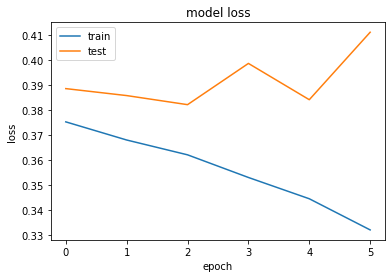

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
predicted = model.predict_classes(X_test)
evaluate(predicted, y_test)

C:\Users\TheRealRondon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.8176288019863439
Balanced Accuracy:  0.6836827920186578
Precision:  0.7833333333333333
Recall:  0.40653531955790484
F1:  0.5352736475798798


In [32]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
import time

X, y =  dataset_10_percent.drop(columns=["gender"]), dataset_10_percent["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

opt = SGD(learning_rate=0.01)
input_d = dataset_10_percent.shape[1]

def build_model(hp):
    model = keras.models.Sequential()
    
    model.add(Dense(hp.Int("input_units", min_value=100, max_value=500, step=20), input_dim=input_d, activation='relu'))
    
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f"dense_units_{i}", min_value=10, max_value=300, step=10), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

t = time.time()
LOG_DIR = f"{int(t)}"

tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 1,
    executions_per_trial = 1,
    directory = LOG_DIR
)

tuner.search(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data=(X_test, y_test))

Trial 1 Complete [00h 04m 35s]
val_accuracy: 0.791558027267456

Best val_accuracy So Far: 0.791558027267456
Total elapsed time: 00h 04m 35s
INFO:tensorflow:Oracle triggered exit


In [33]:
t

1627981259.7144318

In [34]:
with open(f"tuner_{int(t)}.pkl", "wb") as f:
    pickle.dump(tuner, f)
    
tuner = pickle.load(open("tuner_1627981259.pkl", "rb"))
print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())

{'input_units': 100, 'n_layers': 7, 'dense_units_0': 210, 'dense_units_1': 10, 'dense_units_2': 10, 'dense_units_3': 10, 'dense_units_4': 10, 'dense_units_5': 10, 'dense_units_6': 10}
Results summary
Results in 1627981259\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 100
n_layers: 7
dense_units_0: 210
dense_units_1: 10
dense_units_2: 10
dense_units_3: 10
dense_units_4: 10
dense_units_5: 10
dense_units_6: 10
Score: 0.791558027267456
None


In [35]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = tuner.get_best_models()[0]
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=10, callbacks=[callback])

Epoch 1/100
2900/2900 [==============================] - 3s 844us/step - loss: 0.4472 - accuracy: 0.7966 - val_loss: 0.4569 - val_accuracy: 0.7908
Epoch 2/100
2900/2900 [==============================] - 2s 809us/step - loss: 0.4451 - accuracy: 0.7982 - val_loss: 0.4531 - val_accuracy: 0.7908
Epoch 3/100
2900/2900 [==============================] - 2s 808us/step - loss: 0.4426 - accuracy: 0.7979 - val_loss: 0.4556 - val_accuracy: 0.7877
Epoch 4/100
2900/2900 [==============================] - 2s 815us/step - loss: 0.4400 - accuracy: 0.8002 - val_loss: 0.4549 - val_accuracy: 0.7917
Epoch 5/100
2900/2900 [==============================] - 2s 822us/step - loss: 0.4379 - accuracy: 0.8021 - val_loss: 0.4609 - val_accuracy: 0.7880


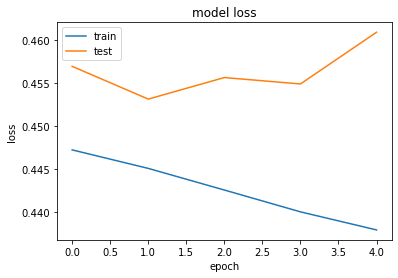

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
predicted = model.predict_classes(X_test)
evaluate(predicted, y_test)

C:\Users\TheRealRondon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.786219739292365
Balanced Accuracy:  0.6177277975503974
Precision:  0.735873850197109
Recall:  0.2691013935607881
F1:  0.39408866995073893


In [38]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.tuners import RandomSearch
import time

X, y =  dataset_20_percent.drop(columns=["gender"]), dataset_20_percent["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

opt = SGD(learning_rate=0.01)
input_d = dataset_20_percent.shape[1]

def build_model(hp):
    model = keras.models.Sequential()
    
    model.add(Dense(hp.Int("input_units", min_value=100, max_value=500, step=20), input_dim=input_d, activation='relu'))
    
    for i in range(hp.Int('n_layers', 1, 10)):
        model.add(Dense(hp.Int(f"dense_units_{i}", min_value=10, max_value=300, step=10), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

t = time.time()
LOG_DIR = f"{int(t)}"

tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 1,
    executions_per_trial = 1,
    directory = LOG_DIR
)

tuner.search(x=X_train, y=y_train, epochs=100, batch_size=10,validation_data=(X_test, y_test))

Trial 1 Complete [00h 04m 32s]
val_accuracy: 0.751334547996521

Best val_accuracy So Far: 0.751334547996521
Total elapsed time: 00h 04m 32s
INFO:tensorflow:Oracle triggered exit


In [39]:
t

1627981770.58637

In [40]:
with open(f"tuner_{int(t)}.pkl", "wb") as f:
    pickle.dump(tuner, f)
    
tuner = pickle.load(open("tuner_1627981770.pkl", "rb"))
print(tuner.get_best_hyperparameters()[0].values)
print(tuner.results_summary())

{'input_units': 260, 'n_layers': 3, 'dense_units_0': 190, 'dense_units_1': 10, 'dense_units_2': 10}
Results summary
Results in 1627981770\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 260
n_layers: 3
dense_units_0: 190
dense_units_1: 10
dense_units_2: 10
Score: 0.751334547996521
None


In [41]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model = tuner.get_best_models()[0]
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=10, callbacks=[callback])

Epoch 1/100
2900/2900 [==============================] - 3s 813us/step - loss: 0.5061 - accuracy: 0.7584 - val_loss: 0.5062 - val_accuracy: 0.7598
Epoch 2/100
2900/2900 [==============================] - 2s 764us/step - loss: 0.5041 - accuracy: 0.7597 - val_loss: 0.5031 - val_accuracy: 0.7598
Epoch 3/100
2900/2900 [==============================] - 2s 772us/step - loss: 0.5027 - accuracy: 0.7601 - val_loss: 0.5028 - val_accuracy: 0.7573
Epoch 4/100
2900/2900 [==============================] - 2s 787us/step - loss: 0.5008 - accuracy: 0.7630 - val_loss: 0.5079 - val_accuracy: 0.7604
Epoch 5/100
2900/2900 [==============================] - 2s 745us/step - loss: 0.4992 - accuracy: 0.7637 - val_loss: 0.5087 - val_accuracy: 0.7573
Epoch 6/100
2900/2900 [==============================] - 2s 749us/step - loss: 0.4974 - accuracy: 0.7642 - val_loss: 0.5037 - val_accuracy: 0.7595


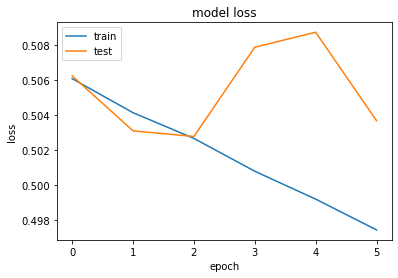

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
predicted = model.predict_classes(X_test)
evaluate(predicted, y_test)

C:\Users\TheRealRondon\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.748975791433892
Balanced Accuracy:  0.571325053125453
Precision:  0.5373891001267427
Recall:  0.20374819798173954
F1:  0.2954703832752613
